## Import Necessary Libraries

https://massdot-impact-crashes-vhb.opendata.arcgis.com/

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
import requests
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_recall_fscore_support, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

## Load the Dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the 2022 and 2023 datasets
file_path_2022 = '/content/drive/MyDrive/BU/Fall 2024/CS506/CS506_Final_Project/Dataset/2022/2022_Crashes.csv'
file_path_2023 = '/content/drive/MyDrive/BU/Fall 2024/CS506/CS506_Final_Project/Dataset/2023/2023_Crashes.csv'

df_2022 = pd.read_csv(file_path_2022)
df_2023 = pd.read_csv(file_path_2023)

<ipython-input-251-a3396b1b1bd0>:5: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(file_path_2022)
<ipython-input-251-a3396b1b1bd0>:6: DtypeWarning: Columns (66,115,116,117,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(file_path_2023)


## Cleaning the Data

### Delete Columns with No Values, Repetitive and Unnecessary Information

In [ ]:
columns_to_drop = [
    'CRASH_DATETIME', 'CRASH_NUMB', 'CRASH_STATUS', 'MAX_INJR_SVRTY_CL', 'MOST_HRMFL_EVT_CL', 'CRASH_HOUR',
    'NUMB_NONFATAL_INJR', 'NUMB_FATAL_INJR', 'POLC_AGNCY_TYPE_DESCR', 'VEHC_MNVR_ACTN_CL', 'NUMB_VEHC',
    'VEHC_TRVL_DIRC_CL', 'VEHC_SEQ_EVENTS_CL', 'FIRST_HRMF_EVENT_DESCR', 'DRVR_CNTRB_CIRC_CL',
    'FIRST_HRMF_EVENT_LOC_DESCR', 'YEAR', 'CURB', 'OBJECTID', 'STREET_NUMB', 'RDWY', 'MANR_COLL_DESCR',
    'DIST_DIRC_FROM_INT', 'NEAR_INT_RDWY', 'MM_RTE', 'DIST_DIRC_MILEMARKER', 'EXIT_RTE', 'VEHC_CONFIG_CL',
    'DIST_DIRC_EXIT', 'EXIT_NUMB', 'DIST_DIRC_LANDMARK', 'LANDMARK', 'TRAFY_DESCR_DESCR',
    'JURISDICTN', 'NON_MTRST_TYPE_CL', 'NON_MTRST_ACTN_CL', 'NON_MTRST_LOC_CL', 'IS_GEOCODED',
    'GEOCODING_METHOD_NAME', 'RMV_DOC_IDS', 'X', 'Y', 'LAT', 'LON', 'CRASH_RPT_IDS', 'CRASH_SEVERITY_DESCR',
    'AGE_NONMTRST_YNGST', 'AGE_NONMTRST_OLDEST', 'DRVR_DISTRACTED_CL', 'DISTRICT_NUM','MILEMARKER',
    'RPA_ABBR', 'VEHC_EMER_USE_CL', 'VEHC_TOWED_FROM_SCENE_CL', 'FMCSA_RPTBL_CL', 'FMCSA_RPTBL',
    'HIT_RUN_DESCR', 'LCLTY_NAME', 'ROAD_CNTRB_DESCR', 'SCHL_BUS_RELD_DESCR',
    'TRAF_CNTRL_DEVC_FUNC_DESCR', 'AADT', 'AADT_YEAR', 'WORK_ZONE_RELD_DESCR', 'PK_PCT_SUT',
    'AV_PCT_SUT', 'PK_PCT_CT', 'AV_PCT_CT', 'TRUCK_RTE', 'LT_SIDEWLK', 'RT_SIDEWLK',
    'SHLDR_LT_W', 'SHLDR_LT_T', 'SURFACE_WD', 'SURFACE_TP', 'SHLDR_RT_W', 'SHLDR_RT_T',
    'MED_WIDTH', 'NUM_LANES', 'OPP_LANES', 'MED_TYPE', 'URBAN_TYPE', 'FACILITY', 'PEAK_LANE',
    'SPEED_LIM', 'STREETNAME', 'FROMSTREETNAME', 'TOSTREETNAME', 'CITY', 'STRUCT_CND',
    'AADT_DERIV', 'STATN_NUM', 'OP_DIR_SL', 'SHLDR_UL_T', 'SHLDR_UL_W', 'F_F_CLASS', 'TRAFFIC_CONTROL_TYPE_DESCR', 'NON_MTRST_ORIGIN_DEST_CL',
    'NON_MTRST_CNTRB_CIRC_CL', 'NON_MTRST_DISTRACTED_BY_CL', 'NON_MTRST_ALC_SUSPD_TYPE_CL',
    'NON_MTRST_DRUG_SUSPD_TYPE_CL', 'NON_MTRST_EVENT_SEQ_CL', 'SHAPE', 'URBAN_AREA', 'URBAN_LOC_TYPE', 'FD_AID_RTE'
]

df_2022 = df_2022.drop(columns=columns_to_drop)
df_2023 = df_2023.drop(columns=columns_to_drop)

In [ ]:
print(df_2022.head())

  CITY_TOWN_NAME CRASH_DATE_TEXT CRASH_TIME_2  \
0        METHUEN      01/01/2022     12:11:00   
1        HOLYOKE      01/01/2022     05:08:00   
2        HOLYOKE      01/01/2022     12:20:00   
3        EVERETT      01/01/2022     11:34:00   
4        WAREHAM      01/01/2022     04:31:00   

                 AMBNT_LIGHT_DESCR WEATH_COND_DESCR ROAD_SURF_COND_DESCR  \
0                         Daylight        Rain/Rain                  Wet   
1           Dark - lighted roadway     Cloudy/Other                  Dry   
2  Dark - unknown roadway lighting           Cloudy                  Wet   
3                         Daylight        Rain/Rain                  Wet   
4           Dark - lighted roadway             Rain                  Wet   

   MILEMARKER   RDWY_JNCT_TYPE_DESCR TRAF_CNTRL_DEVC_TYPE_DESCR  \
0         NaN  Four-way intersection                 Stop signs   
1         NaN        Not at junction                No controls   
2         NaN        Not at junction           

In [ ]:
print(df_2023.head())

  CITY_TOWN_NAME CRASH_DATE_TEXT CRASH_TIME_2       AMBNT_LIGHT_DESCR  \
0         DEDHAM      01/01/2023     01:15:00  Dark - lighted roadway   
1     CHELMSFORD      01/01/2023     01:18:00                Daylight   
2     CHELMSFORD      01/01/2023     08:12:00  Dark - lighted roadway   
3       BROCKTON      01/01/2023     12:23:00  Dark - lighted roadway   
4        READING      01/02/2023     07:47:00  Dark - lighted roadway   

  WEATH_COND_DESCR ROAD_SURF_COND_DESCR  MILEMARKER RDWY_JNCT_TYPE_DESCR  \
0      Rain/Cloudy                  Wet         NaN      Not at junction   
1            Clear                  Dry         NaN      Not at junction   
2      Clear/Clear                  Dry         NaN      Not at junction   
3           Cloudy                  Wet         NaN      Not at junction   
4      Clear/Clear                  Dry         NaN      Not at junction   

  TRAF_CNTRL_DEVC_TYPE_DESCR AGE_DRVR_YNGST AGE_DRVR_OLDEST  CNTY_NAME  \
0                No controls  

### Identify Possible Values (Categories) for Each Categorical Column

In [ ]:
categorical_columns_2022 = df_2022.select_dtypes(include=['object']).columns
for column in categorical_columns_2022:
    print(f"Unique values in '{column}':", df_2022[column].unique())

Unique values in 'CITY_TOWN_NAME': ['METHUEN' 'HOLYOKE' 'EVERETT' 'WAREHAM' 'NORTH ATTLEBOROUGH' 'NANTUCKET'
 'DEDHAM' 'BRAINTREE' 'FALL RIVER' 'BERNARDSTON' 'BILLERICA' 'DARTMOUTH'
 'BEDFORD' 'FITCHBURG' 'WALPOLE' 'NORTH ADAMS' 'NORTON' 'MIDDLEBOROUGH'
 'HUDSON' 'FOXBOROUGH' 'WEST BRIDGEWATER' 'EASTON' 'WINTHROP'
 'WESTBOROUGH' 'HAVERHILL' 'TAUNTON' 'BEVERLY' 'ATTLEBORO' 'DRACUT'
 'DOVER' 'CHELSEA' 'NEW BEDFORD' 'WALTHAM' 'FAIRHAVEN' 'HOPKINTON'
 'BOURNE' 'WILBRAHAM' 'SHARON' 'HULL' 'READING' 'SALISBURY' 'MEDFORD'
 'YARMOUTH' 'SEEKONK' 'WESTWOOD' 'MANSFIELD' 'LAKEVILLE' 'ABINGTON'
 'PLYMOUTH' 'ARLINGTON' 'MARLBOROUGH' 'BLACKSTONE' 'ANDOVER' 'WELLESLEY'
 'MARION' 'WAKEFIELD' 'MIDDLETON' 'MANCHESTER' 'STOCKBRIDGE' 'SOUTHWICK'
 'REVERE' 'CHICOPEE' 'PITTSFIELD' 'CHATHAM' 'GRANBY' 'MEDWAY' 'FRANKLIN'
 'ASHBURNHAM' 'BOYLSTON' 'REHOBOTH' 'LYNN' 'WESTON' 'BOSTON' 'FRAMINGHAM'
 'CHARLTON' 'SWANSEA' 'HARVARD' 'FALMOUTH' 'MILTON' 'QUINCY' 'SANDWICH'
 'GRAFTON' 'UPTON' 'STURBRIDGE' 'HUNTINGTON' '

In [ ]:
categorical_columns_2023 = df_2023.select_dtypes(include=['object']).columns
for column in categorical_columns_2023:
    print(f"Unique values in '{column}':", df_2023[column].unique())

Unique values in 'CITY_TOWN_NAME': ['DEDHAM' 'CHELMSFORD' 'BROCKTON' 'READING' 'WAKEFIELD' 'WAREHAM'
 'FITCHBURG' 'WILBRAHAM' 'WELLESLEY' 'WAYLAND' 'FALL RIVER' 'BROOKLINE'
 'SWANSEA' 'DARTMOUTH' 'NANTUCKET' 'SALEM' 'RANDOLPH' 'AVON' 'ATTLEBORO'
 'YARMOUTH' 'DRACUT' 'HAVERHILL' 'TAUNTON' 'EVERETT' 'BILLERICA'
 'SPRINGFIELD' 'MARLBOROUGH' 'MIDDLEBOROUGH' 'DUXBURY' 'REHOBOTH'
 'ABINGTON' 'WEST BOYLSTON' 'EASTON' 'LUDLOW' 'NATICK' 'BEVERLY' 'GROTON'
 'ACTON' 'MANSFIELD' 'WESTON' 'PEABODY' 'DANVERS' 'AGAWAM' 'LANCASTER'
 'LYNN' 'NORTON' 'CLINTON' 'ARLINGTON' 'MIDDLETON' 'FRANKLIN' 'HOLYOKE'
 'PALMER' 'CONCORD' 'FOXBOROUGH' 'STONEHAM' 'AUBURN' 'WORCESTER' 'BOLTON'
 'NEW BEDFORD' 'WRENTHAM' 'LONGMEADOW' 'BRAINTREE' 'NEWTON' 'BOSTON'
 'QUINCY' 'SOMERVILLE' 'NORTH ATTLEBOROUGH' 'HINGHAM' 'MILLBURY' 'REVERE'
 'MEDFORD' 'WALPOLE' 'WALTHAM' 'CHELSEA' 'LAKEVILLE' 'FRAMINGHAM'
 'ANDOVER' 'BEDFORD' 'NORWOOD' 'MEDWAY' 'SAUGUS' 'WESTFORD' 'BARNSTABLE'
 'GLOUCESTER' 'RUSSELL' 'WILMINGTON' 'LEOMINSTER' 

### Filter Observations for Greater Boston Cities (within Massachusetts)

In [ ]:
# List of Greater Boston area city and town names
greater_boston_cities = [
    'BOSTON', 'CHELSEA', 'REVERE', 'WINTHROP',  # Suffolk County
    'ARLINGTON', 'BEDFORD', 'BELMONT', 'BURLINGTON', 'CAMBRIDGE', 'EVERETT', 'FRAMINGHAM', 'LEXINGTON', 'LINCOLN',
    'MALDEN', 'MEDFORD', 'MELROSE', 'NATICK', 'NEWTON', 'NORTH READING', 'READING', 'SOMERVILLE', 'STONEHAM',
    'WAKEFIELD', 'WALTHAM', 'WATERTOWN', 'WAYLAND', 'WESTON', 'WILMINGTON', 'WINCHESTER', 'WOBURN',  # Middlesex County
    'BRAINTREE', 'BROOKLINE', 'CANTON', 'DEDHAM', 'FOXBOROUGH', 'FRANKLIN', 'MEDFIELD', 'MILTON', 'NEEDHAM',
    'NORWOOD', 'QUINCY', 'RANDOLPH', 'SHARON', 'WALPOLE', 'WELLESLEY', 'WESTWOOD', 'WEYMOUTH',  # Norfolk County
    'ANDOVER', 'BEVERLY', 'DANVERS', 'GLOUCESTER', 'HAVERHILL', 'LAWRENCE', 'LYNN', 'MARBLEHEAD', 'PEABODY',
    'SALEM', 'SAUGUS', 'SWAMPSCOTT', 'TOPSFIELD',  # Essex County
    'ABINGTON', 'HINGHAM', 'HULL', 'MARSHFIELD', 'NORWELL', 'ROCKLAND', 'SCITUATE', 'WHITMAN'  # Plymouth County
]

# Filter the DataFrame to include only rows with 'CITY_TOWN_NAME' in the Greater Boston cities list
df_2022 = df_2022[df_2022['CITY_TOWN_NAME'].isin(greater_boston_cities)]
df_2023 = df_2023[df_2023['CITY_TOWN_NAME'].isin(greater_boston_cities)]

### Drop Columns with > 50% Missing Data


In [ ]:
# Drop columns with more than 50% missing values
df_2022 = df_2022.dropna(thresh=len(df_2022) * 0.5, axis=1)
df_2023 = df_2023.dropna(thresh=len(df_2023) * 0.5, axis=1)

### Combine Crash Date and Time and Generate Categories for More Time-Related Indicators

### Date and Time-Based Feature Engineering

In [ ]:
# Define a function to add holiday and datetime features
def add_holiday_and_datetime_features(df, year):
    # Get U.S. national holidays for the specified year
    us_holidays = holidays.US(years=year)

    # Create a list of holiday dates
    holiday_dates = list(us_holidays.keys())

    # Add a new column 'IS_HOLIDAY' (1 if the date is a holiday, 0 otherwise)
    df['IS_HOLIDAY'] = df['CRASH_DATE_TEXT'].apply(lambda x: 1 if x in holiday_dates else 0)

    # Convert 'CRASH_DATE_TEXT' to datetime format to ensure consistency
    df['CRASH_DATE_TEXT'] = pd.to_datetime(df['CRASH_DATE_TEXT'], errors='coerce')

    # Combine 'CRASH_DATE_TEXT' and 'CRASH_TIME_2' into a single datetime column
    df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH_DATE_TEXT'].astype(str) + ' ' + df['CRASH_TIME_2'], errors='coerce')

    # Extract various time-based features as needed
    df['CRASH_HOUR'] = df['CRASH_DATETIME'].dt.hour
    df['DAY_OF_WEEK'] = df['CRASH_DATETIME'].dt.dayofweek  # Monday=0, Sunday=6
    df['IS_WEEKEND'] = df['DAY_OF_WEEK'].apply(lambda x: 1 if x >= 5 else 0)
    df['IS_NIGHT'] = df['CRASH_HOUR'].apply(lambda x: 1 if (x >= 20 or x < 6) else 0)

    # Drop the original separate date and time columns if no longer needed
    df = df.drop(columns=['CRASH_DATE_TEXT', 'CRASH_TIME_2'])

    return df

# Apply the function to both DataFrames with the appropriate year
df_2022 = add_holiday_and_datetime_features(df_2022, 2022)
df_2023 = add_holiday_and_datetime_features(df_2023, 2023)

# Check if both DataFrames have the same columns
if set(df_2022.columns) == set(df_2023.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The DataFrames have different columns.")
    # If they differ, display the columns that are unique to each
    print("Columns in df_2022 but not in df_2023:", set(df_2022.columns) - set(df_2023.columns))
    print("Columns in df_2023 but not in df_2022:", set(df_2023.columns) - set(df_2022.columns))

Both DataFrames have the same columns.


In [ ]:
def add_rush_hour_indicator(df):
    # Add a new column 'IS_RUSH_HOUR' (1 if the time is during rush hour, 0 otherwise)
    df['IS_RUSH_HOUR'] = df['CRASH_HOUR'].apply(lambda x: 1 if (6 <= x < 10) or (15 <= x < 19) else 0)
    return df

# Apply the function to both DataFrames
df_2022 = add_rush_hour_indicator(df_2022)
df_2023 = add_rush_hour_indicator(df_2023)

### Simplify Weather Conditions

In [ ]:
# Define a function to simplify weather conditions
def simplify_weather(df):
    df['WEATHER_SIMPLIFIED'] = df['WEATH_COND_DESCR'].apply(lambda x:
        'Clear' if 'Clear' in str(x) else
        'Rain' if 'Rain' in str(x) else
        'Snow' if 'Snow' in str(x) else
        'Fog/Smoke' if 'Fog' in str(x) or 'smog' in str(x) else
        'Hail' if 'Sleet' in str(x) or 'hail' in str(x) or 'freezing rain' in str(x) else
        'Wind' if 'Severe crosswinds' in str(x) else
        'Blowing Sand/Snow' if 'Blowing sand' in str(x) else
        'Unknown' if 'Unknown' in str(x) or 'Not Reported' in str(x) else
        'Other'
    )
    return df

# Apply the function to both DataFrames
df_2022 = simplify_weather(df_2022)
df_2023 = simplify_weather(df_2023)

### Drop 'Unknown' Values for Additional Columns

In [ ]:
columns_to_clean = [
    'WEATHER_SIMPLIFIED', 'AMBNT_LIGHT_DESCR',
    'ROAD_SURF_COND_DESCR', 'RDWY_JNCT_TYPE_DESCR', 'TRAF_CNTRL_DEVC_TYPE_DESCR'
]

# Replace 'Unknown', 'Not reported', and NaN with None, then drop rows with any None values in key columns
df_2022 = df_2022.replace(['Unknown', 'Not reported', 'Reported but invalid'], None).dropna(subset=columns_to_clean)
df_2023 = df_2023.replace(['Unknown', 'Not reported', 'Reported but invalid'], None).dropna(subset=columns_to_clean)

### Create Interaction Terms

In [ ]:
# Interaction terms
df_2022['WEATHER_RUSH_HOUR'] = df_2022['WEATHER_SIMPLIFIED'] + "_" + df_2022['IS_RUSH_HOUR'].astype(str)
df_2022['WEATHER_NIGHT'] = df_2022['WEATHER_SIMPLIFIED'] + "_" + df_2022['IS_NIGHT'].astype(str)
df_2022['WEATHER_WEEKEND'] = df_2022['WEATHER_SIMPLIFIED'] + "_" + df_2022['IS_WEEKEND'].astype(str)

# Repeat for df_2023
df_2023['WEATHER_RUSH_HOUR'] = df_2023['WEATHER_SIMPLIFIED'] + "_" + df_2023['IS_RUSH_HOUR'].astype(str)
df_2023['WEATHER_NIGHT'] = df_2023['WEATHER_SIMPLIFIED'] + "_" + df_2023['IS_NIGHT'].astype(str)
df_2023['WEATHER_WEEKEND'] = df_2023['WEATHER_SIMPLIFIED'] + "_" + df_2023['IS_WEEKEND'].astype(str)


### Segment by Time and Weather

In [ ]:
# Define time segments based on crash hour
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_2022['TIME_OF_DAY'] = df_2022['CRASH_HOUR'].apply(time_of_day)
df_2023['TIME_OF_DAY'] = df_2023['CRASH_HOUR'].apply(time_of_day)

### Create Synthetic "Non-Accident" Data

### Engineer Interaction Terms for Both Datasets

In [ ]:
import numpy as np

# Define a function to add realistic variability for synthetic non-accident data
def generate_synthetic_data(df):
    # Set realistic distributions for weather conditions to simulate non-accidents
    weather_conditions = ['Clear', 'Cloudy', 'Fog/Smoke']
    weather_probabilities = [0.8, 0.15, 0.05]  # Non-accidents are more likely under clear conditions
    df['WEATHER_SIMPLIFIED'] = np.random.choice(weather_conditions, size=len(df), p=weather_probabilities)

    # Increase likelihood of non-accidents occurring during non-rush hours and daylight
    df['IS_RUSH_HOUR'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])  # 70% non-rush hours
    df['IS_NIGHT'] = np.random.choice([0, 1], size=len(df), p=[0.2, 0.8])  # 80% daytime occurrences

    # Simulate fewer weekend occurrences, assuming most non-accidents might happen on weekdays
    df['IS_WEEKEND'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])  # 80% weekday

    # Simulate broader speed limits for non-accidents, as they may occur more frequently at lower speeds
    speed_limits = ['<30 mph', '30-50 mph', '>50 mph']
    speed_probabilities = [0.4, 0.5, 0.1]  # Higher probability for lower and moderate speeds
    df['SPEED_LIMIT_RANGE'] = np.random.choice(speed_limits, size=len(df), p=speed_probabilities)

    # Introduce controlled variability in the 'CRASH_HOUR' and 'DAY_OF_WEEK' columns
    df['CRASH_HOUR'] = (df['CRASH_HOUR'] + np.random.randint(-2, 3, size=len(df))) % 24  # Shift hours slightly
    df['DAY_OF_WEEK'] = (df['DAY_OF_WEEK'] + np.random.randint(-1, 2, size=len(df))) % 7  # Shift days slightly

    # Adjust distributions for ambient light to reflect more non-accidents occurring in daylight
    light_conditions = ['Daylight', 'Dark - lighted roadway', 'Dusk', 'Dawn', 'Unknown']
    light_probs = [0.7, 0.15, 0.05, 0.05, 0.05]  # More likely in daylight for non-accidents
    df['AMBNT_LIGHT_DESCR'] = np.random.choice(light_conditions, size=len(df), p=light_probs)

    # Simulate road surface conditions with higher likelihood of dry roads for non-accidents
    road_conditions = ['Dry', 'Wet', 'Snow', 'Ice', 'Slush', 'Unknown']
    road_probs = [0.75, 0.2, 0.02, 0.01, 0.01, 0.01]
    df['ROAD_SURF_COND_DESCR'] = np.random.choice(road_conditions, size=len(df), p=road_probs)

    # Increase likelihood of non-accidents occurring at non-intersections
    junction_types = ['Not at junction', 'Four-way intersection', 'T-intersection', 'Unknown']
    junction_probs = [0.8, 0.1, 0.05, 0.05]
    df['RDWY_JNCT_TYPE_DESCR'] = np.random.choice(junction_types, size=len(df), p=junction_probs)

    # Simulate traffic control device types for non-accidents, with most occurring without controls
    traffic_control = ['No controls', 'Traffic control signal', 'Stop signs', 'Yield signs', 'Unknown']
    control_probs = [0.7, 0.15, 0.1, 0.03, 0.02]
    df['TRAF_CNTRL_DEVC_TYPE_DESCR'] = np.random.choice(traffic_control, size=len(df), p=control_probs)

    return df

## Preliminary Visualizations

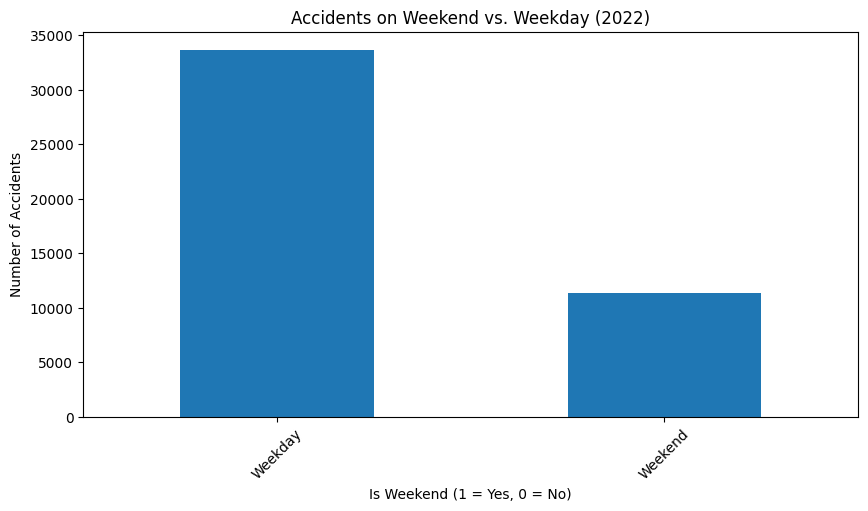

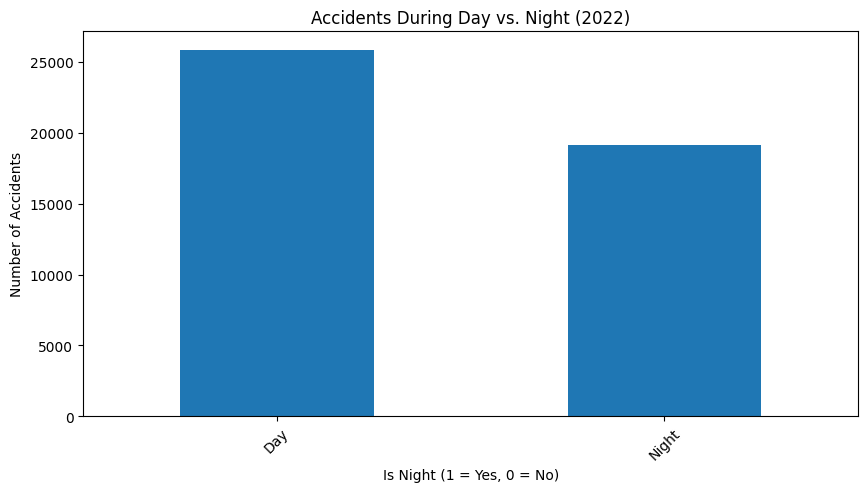

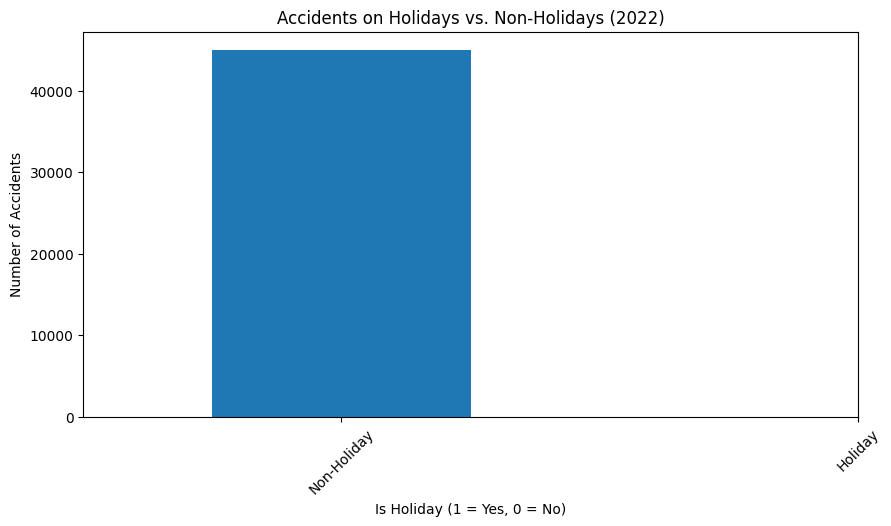

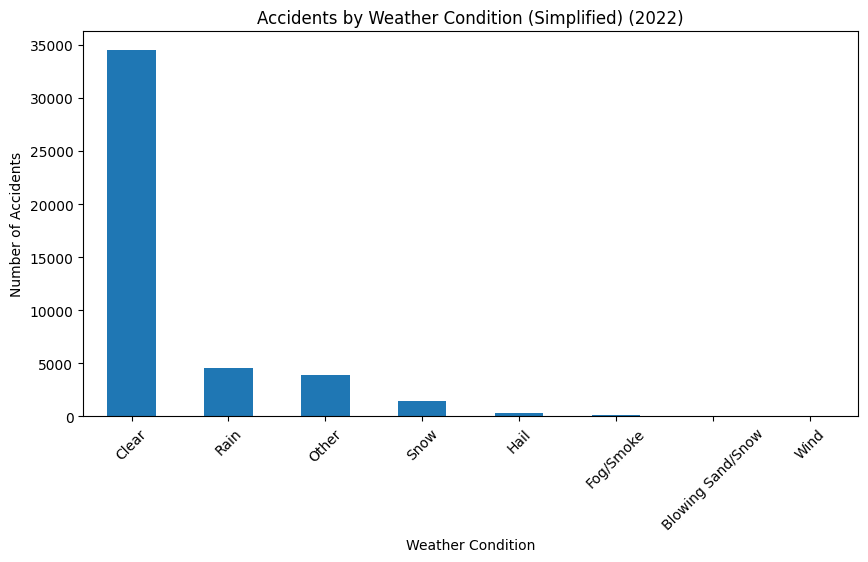

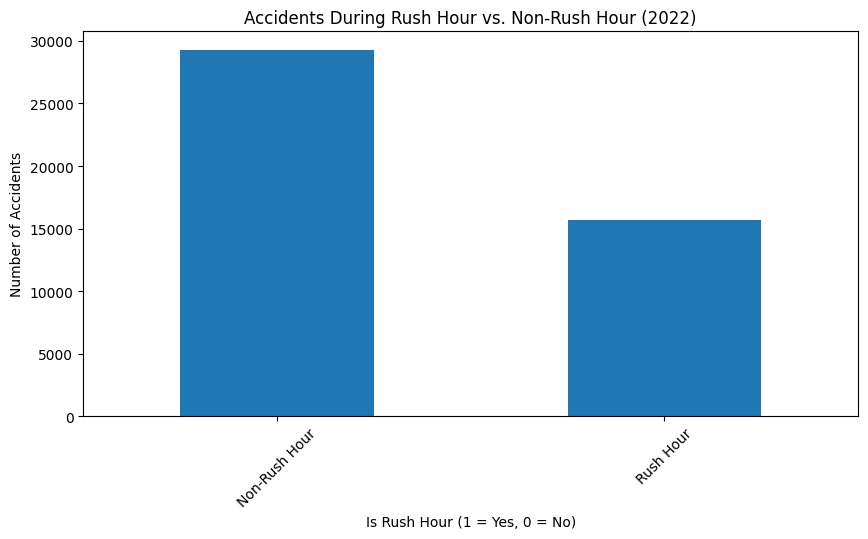

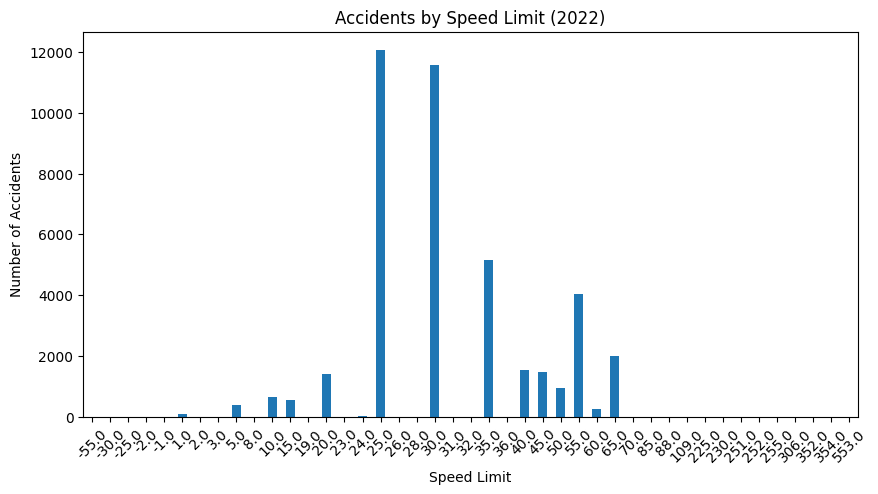

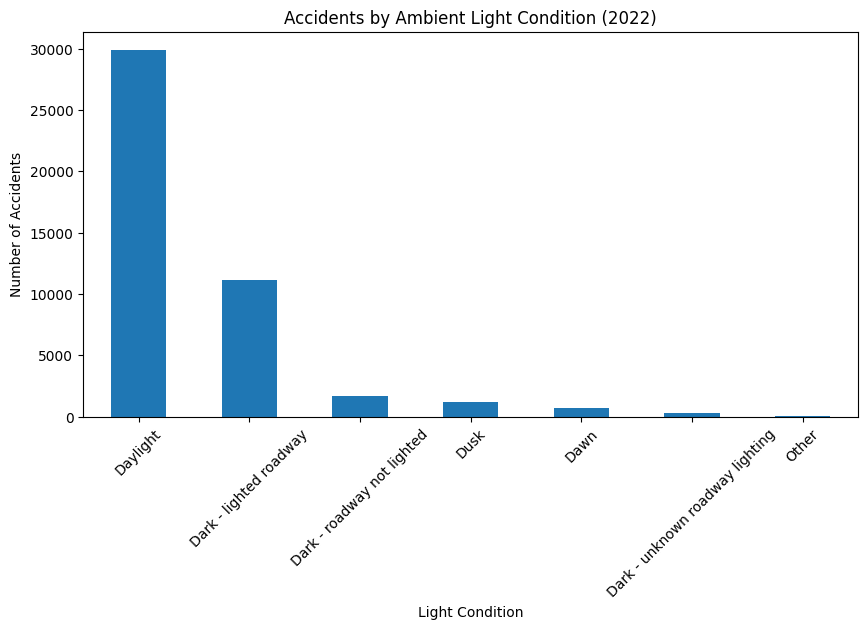

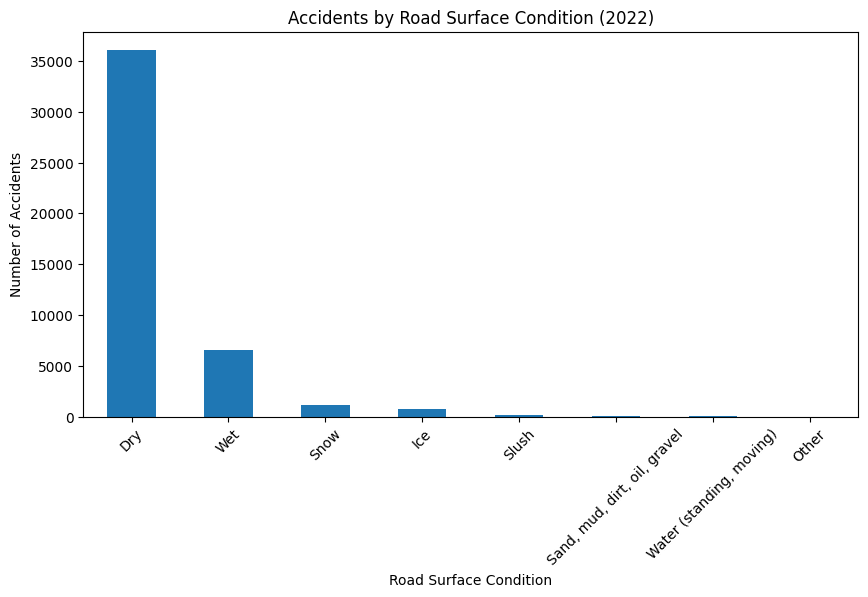

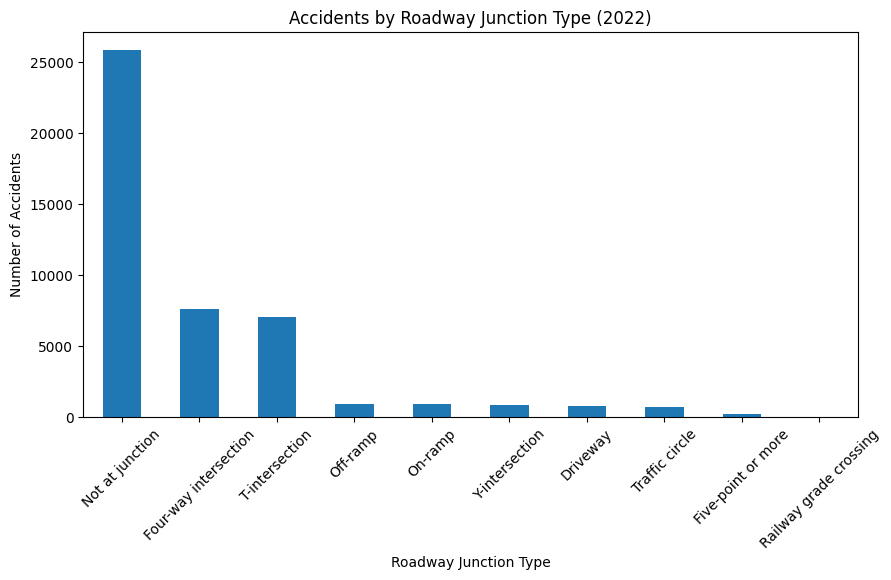

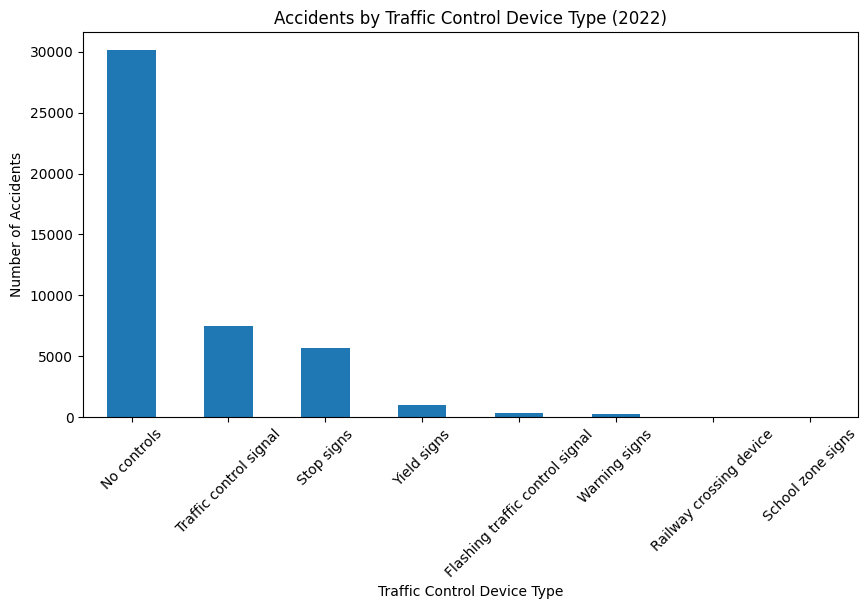

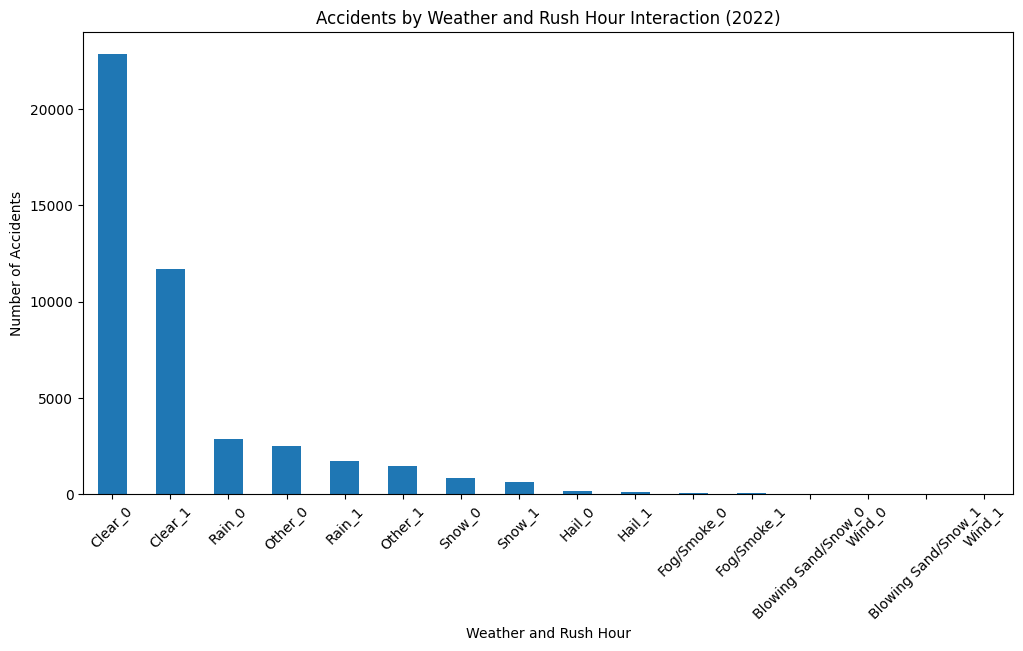

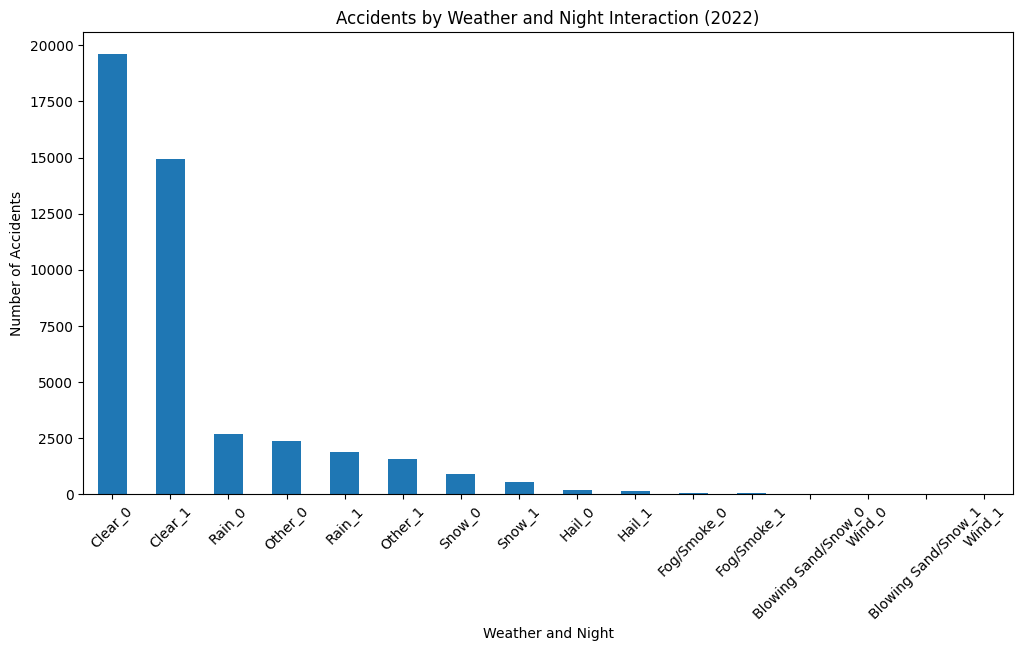

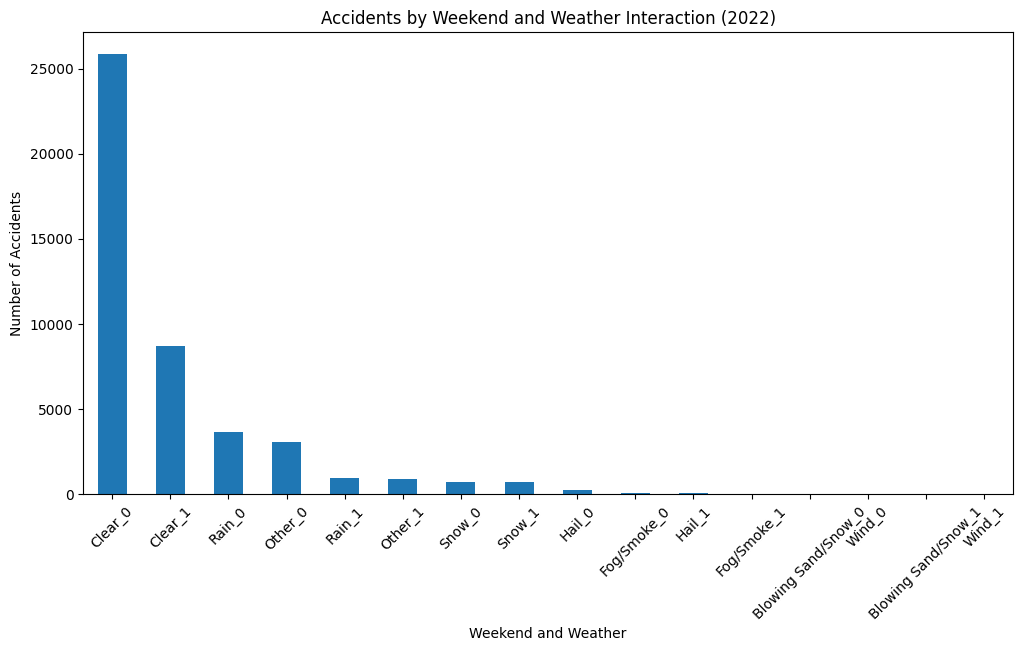

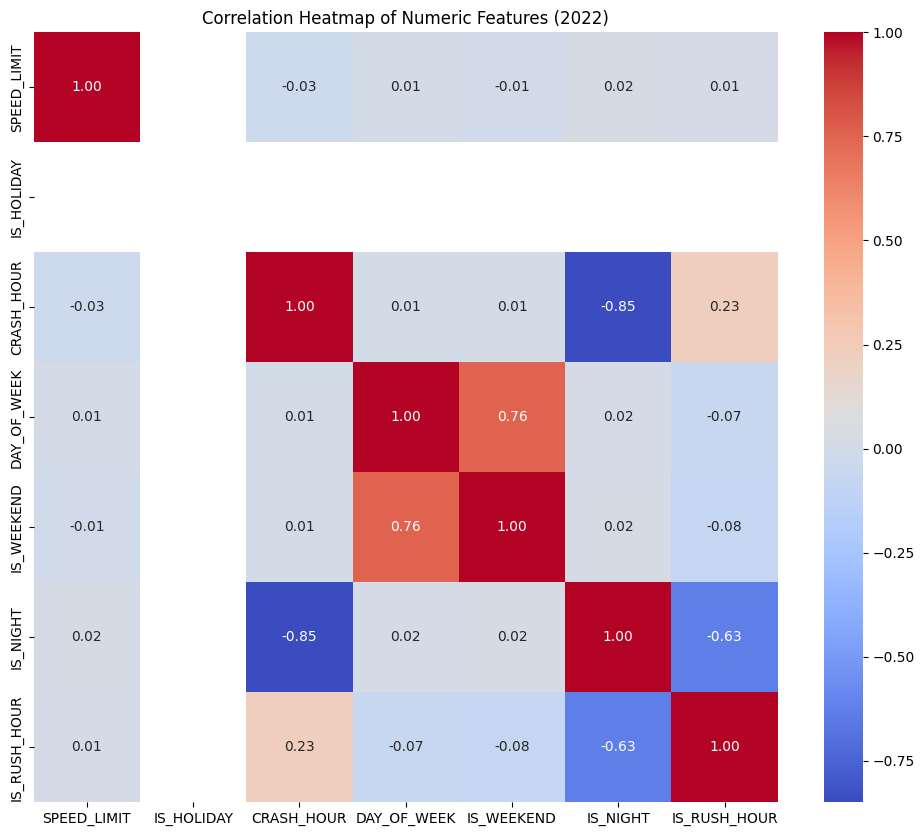

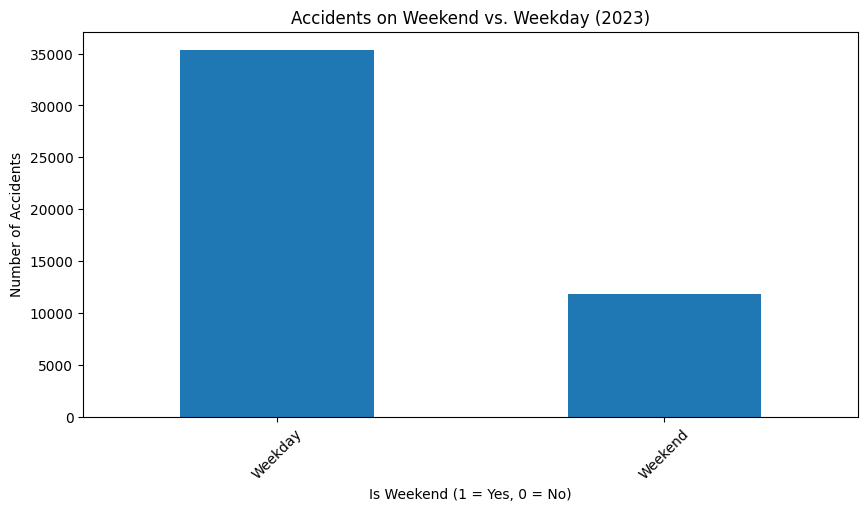

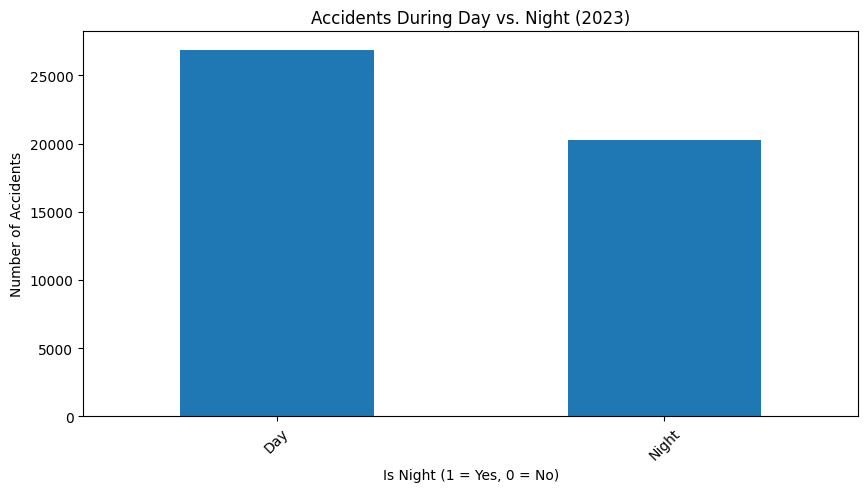

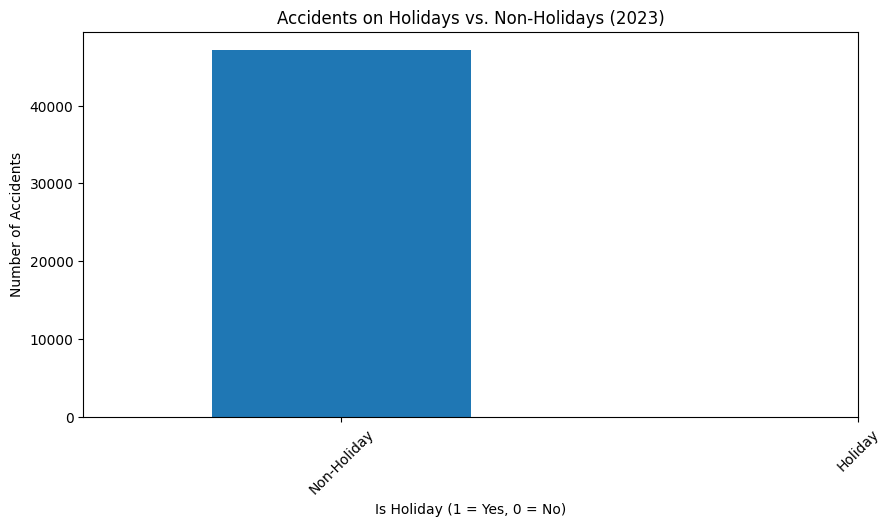

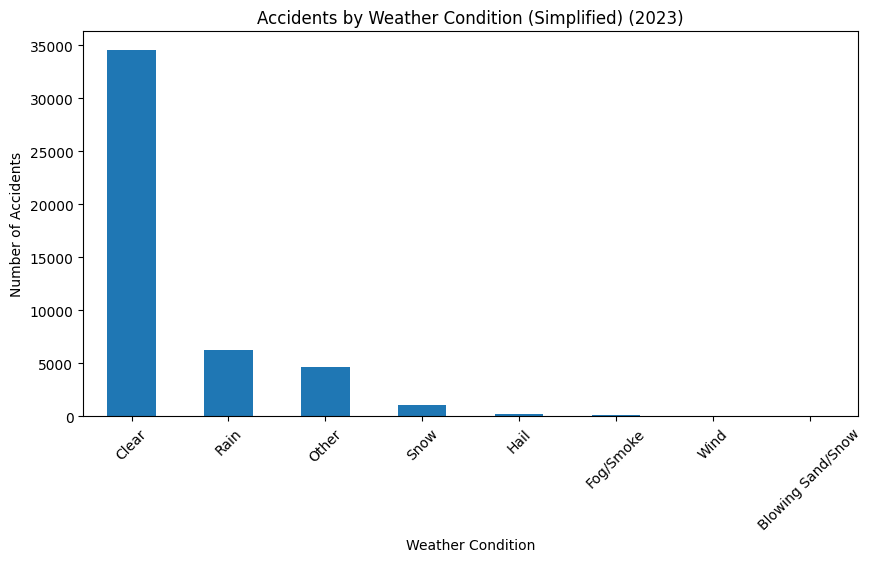

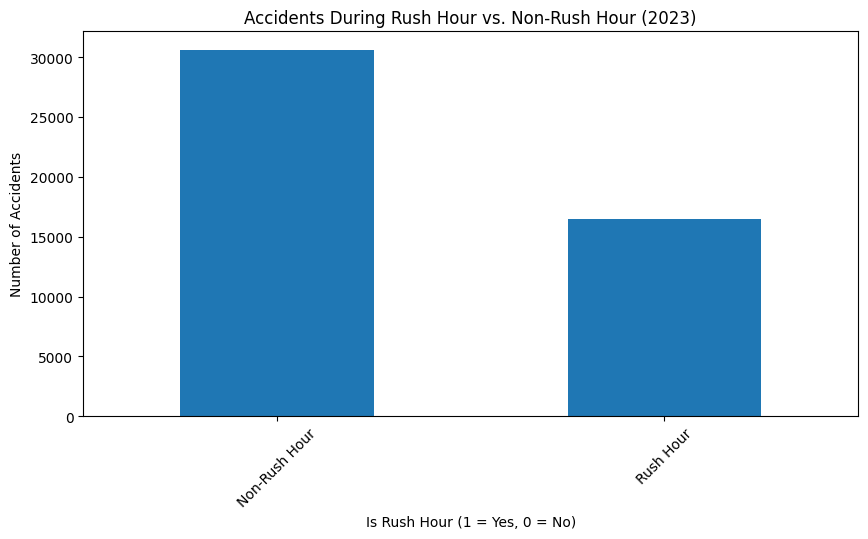

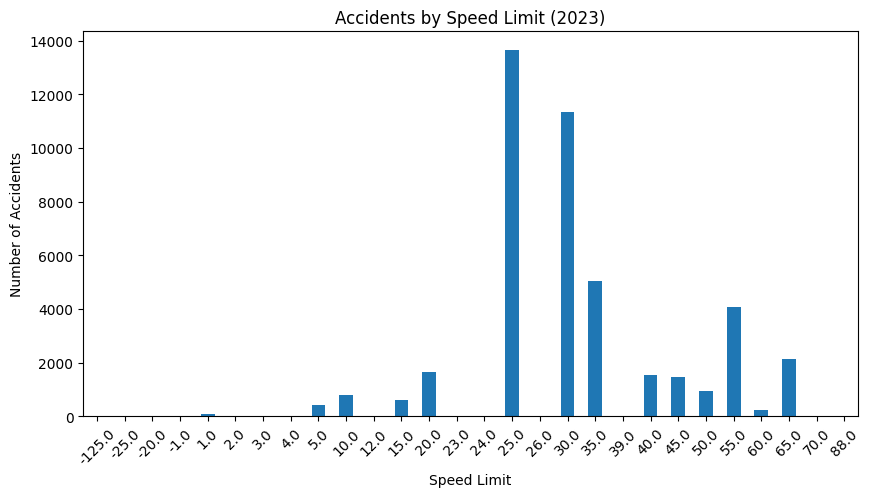

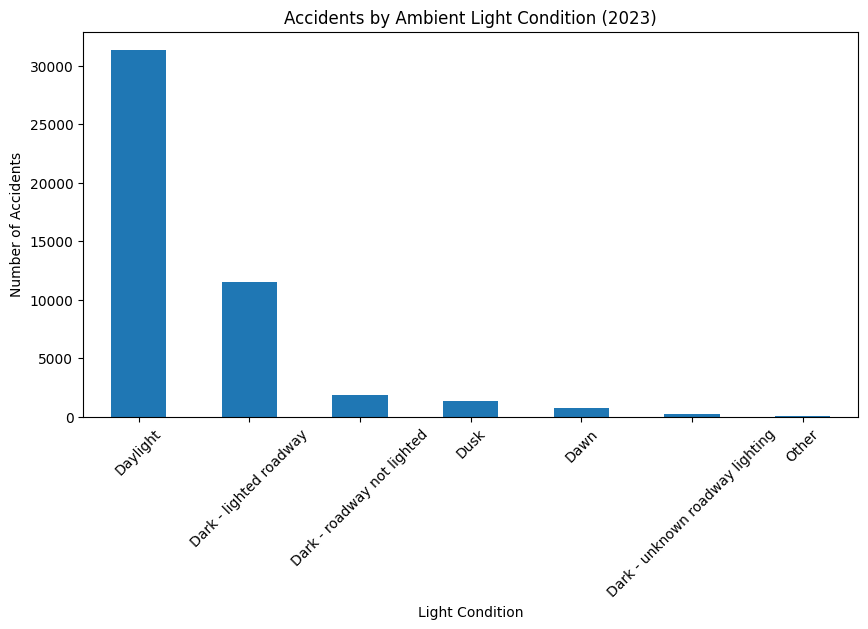

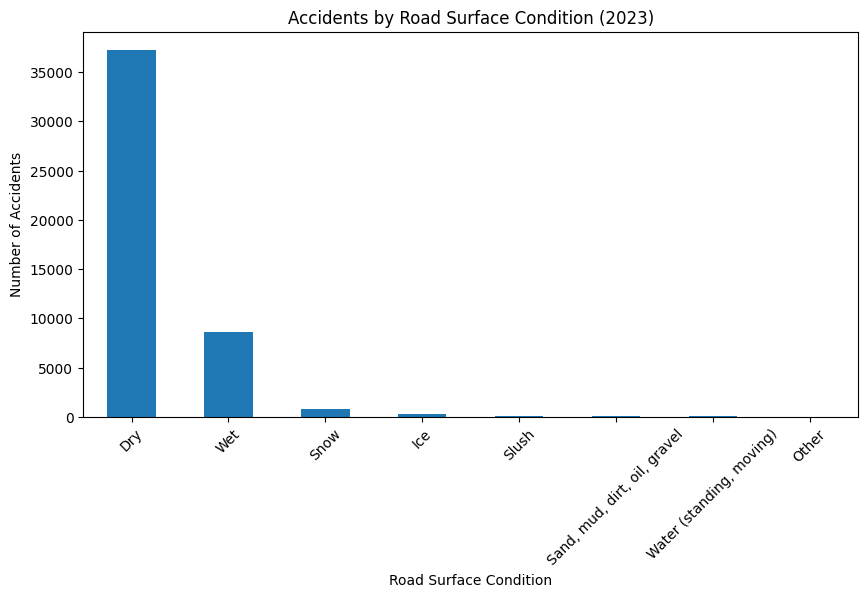

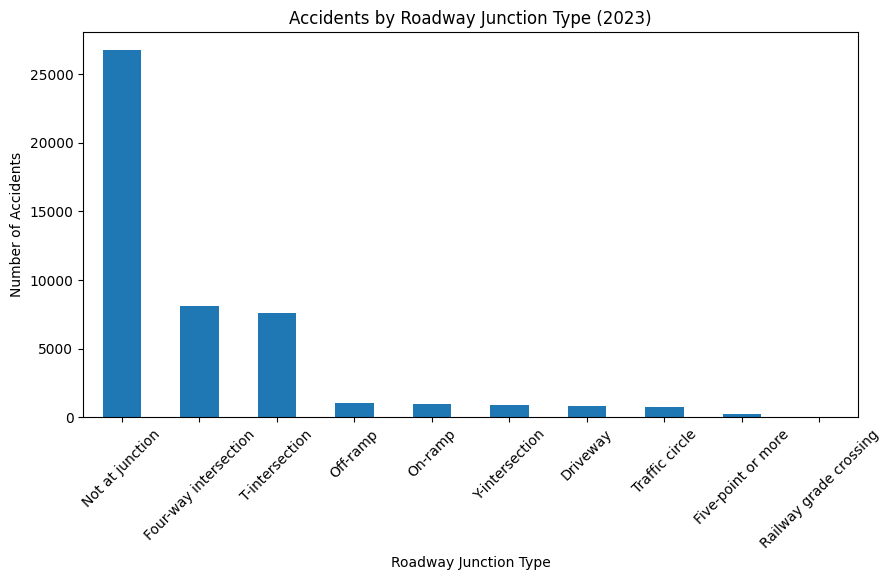

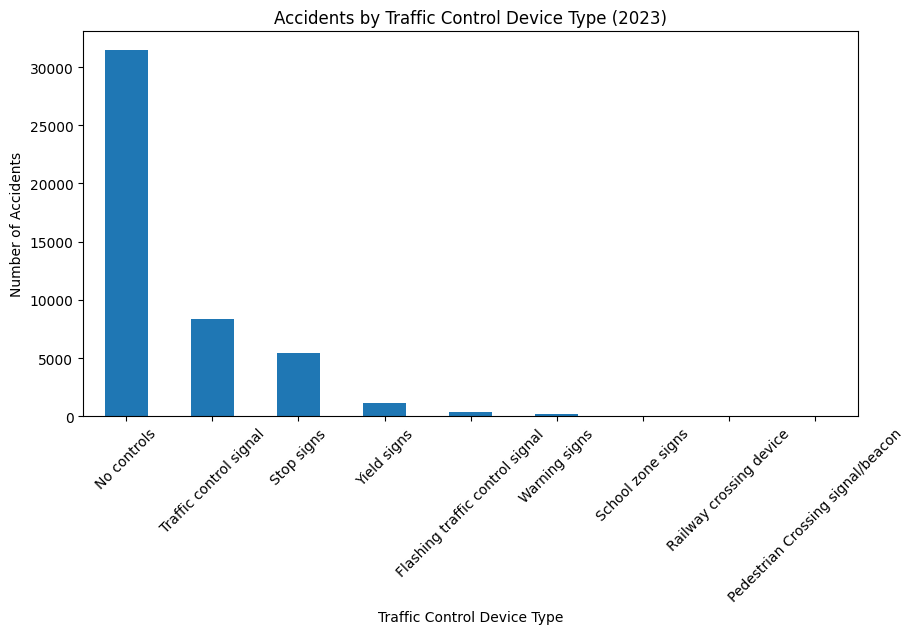

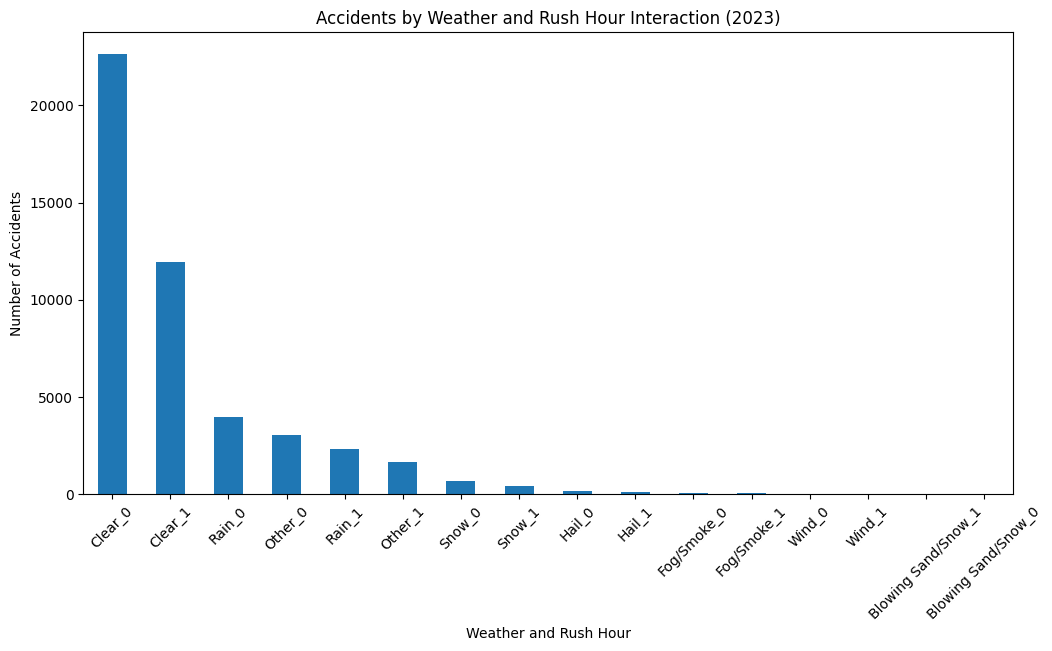

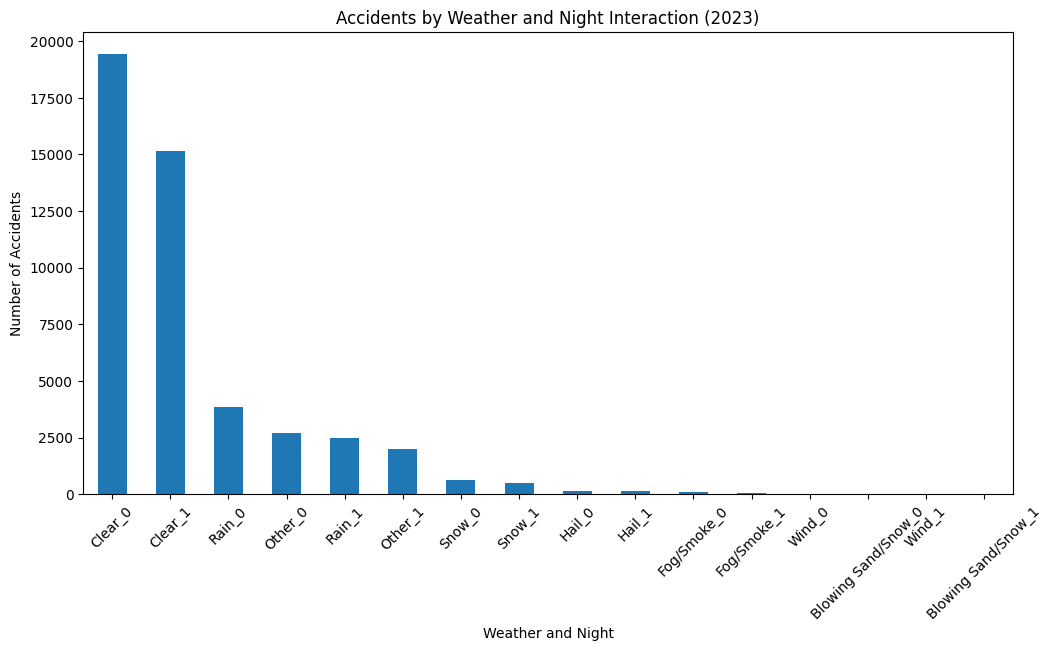

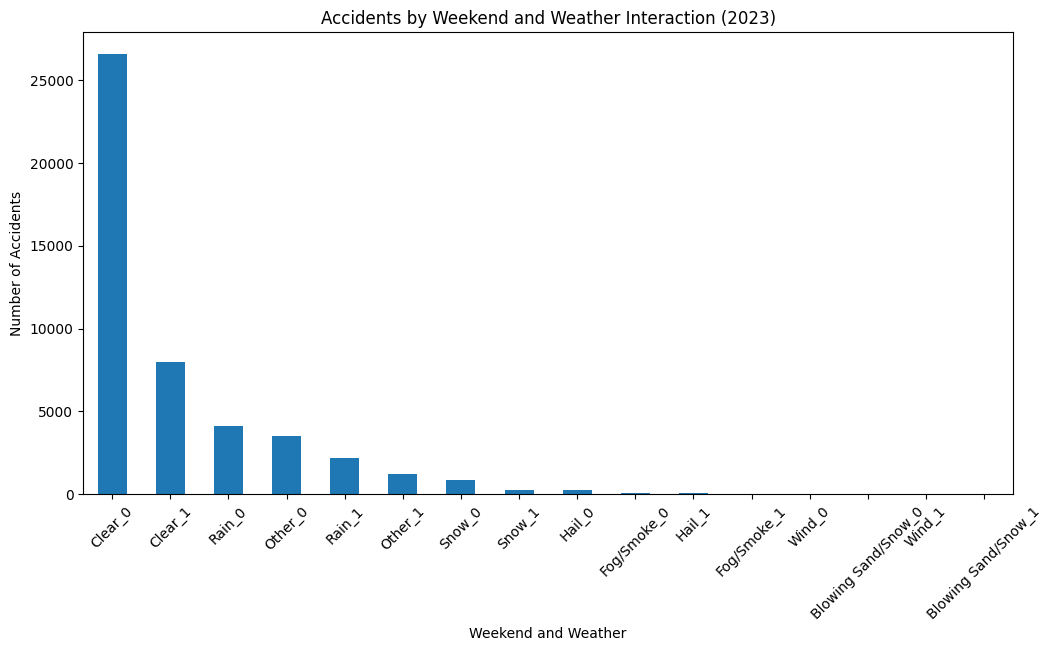

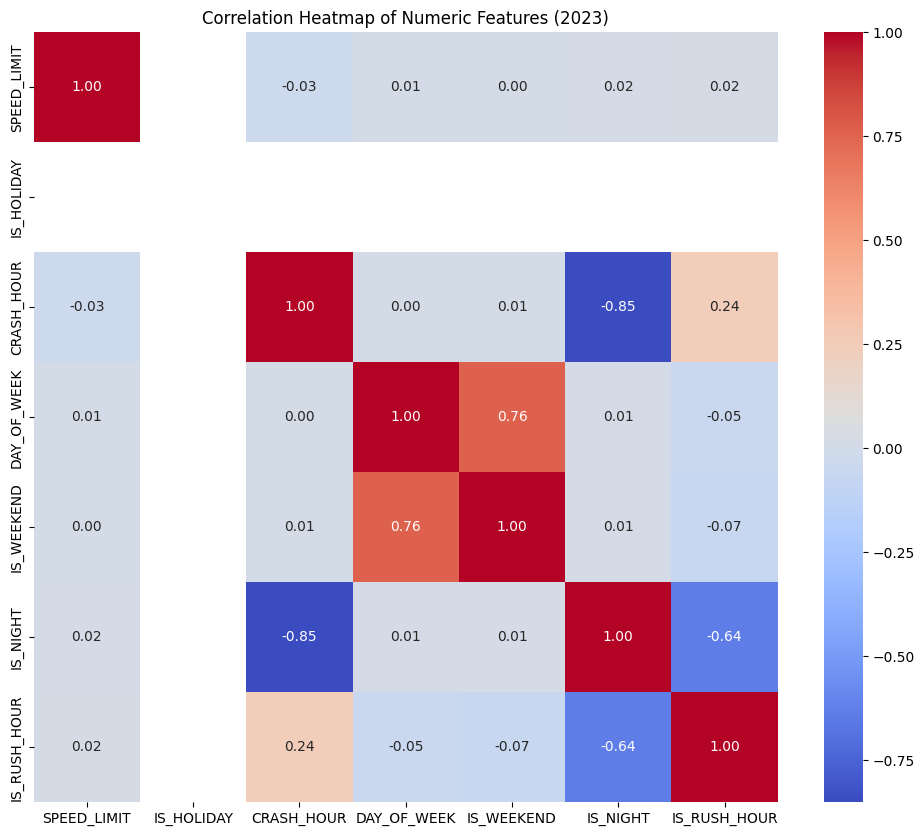

In [ ]:
# function to visualize dataset with interaction terms
def visualize_dataset(df, year):
    # 1. Accidents by Weekend vs. Weekday
    df['IS_WEEKEND'].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Accidents on Weekend vs. Weekday ({year})")
    plt.xlabel("Is Weekend (1 = Yes, 0 = No)")
    plt.ylabel("Number of Accidents")
    plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=45)
    plt.show()

    # 2. Accidents During Day vs. Night
    df['IS_NIGHT'].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Accidents During Day vs. Night ({year})")
    plt.xlabel("Is Night (1 = Yes, 0 = No)")
    plt.ylabel("Number of Accidents")
    plt.xticks(ticks=[0, 1], labels=['Day', 'Night'], rotation=45)
    plt.show()

    # 3. Accidents on Holidays vs. Non-Holidays
    df['IS_HOLIDAY'].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Accidents on Holidays vs. Non-Holidays ({year})")
    plt.xlabel("Is Holiday (1 = Yes, 0 = No)")
    plt.ylabel("Number of Accidents")
    plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=45)
    plt.show()

    # 4. Accidents by Weather Condition (Simplified)
    df['WEATHER_SIMPLIFIED'].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Accidents by Weather Condition (Simplified) ({year})")
    plt.xlabel("Weather Condition")
    plt.ylabel("Number of Accidents")
    plt.xticks(rotation=45)
    plt.show()

    # 5. Accidents During Rush Hour vs. Non-Rush Hour
    df['IS_RUSH_HOUR'].value_counts().plot(kind='bar', figsize=(10, 5))
    plt.title(f"Accidents During Rush Hour vs. Non-Rush Hour ({year})")
    plt.xlabel("Is Rush Hour (1 = Yes, 0 = No)")
    plt.ylabel("Number of Accidents")
    plt.xticks(ticks=[0, 1], labels=['Non-Rush Hour', 'Rush Hour'], rotation=45)
    plt.show()

    # 6. Accidents by Speed Limit
    if 'SPEED_LIMIT' in df.columns:
        df['SPEED_LIMIT'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
        plt.title(f"Accidents by Speed Limit ({year})")
        plt.xlabel("Speed Limit")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 7. Accidents by Light Condition
    if 'AMBNT_LIGHT_DESCR' in df.columns:
        df['AMBNT_LIGHT_DESCR'].value_counts().plot(kind='bar', figsize=(10, 5))
        plt.title(f"Accidents by Ambient Light Condition ({year})")
        plt.xlabel("Light Condition")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 8. Accidents by Road Surface Condition
    if 'ROAD_SURF_COND_DESCR' in df.columns:
        df['ROAD_SURF_COND_DESCR'].value_counts().plot(kind='bar', figsize=(10, 5))
        plt.title(f"Accidents by Road Surface Condition ({year})")
        plt.xlabel("Road Surface Condition")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 9. Accidents by Roadway Junction Type
    if 'RDWY_JNCT_TYPE_DESCR' in df.columns:
        df['RDWY_JNCT_TYPE_DESCR'].value_counts().plot(kind='bar', figsize=(10, 5))
        plt.title(f"Accidents by Roadway Junction Type ({year})")
        plt.xlabel("Roadway Junction Type")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 10. Accidents by Traffic Control Device Type
    if 'TRAF_CNTRL_DEVC_TYPE_DESCR' in df.columns:
        df['TRAF_CNTRL_DEVC_TYPE_DESCR'].value_counts().plot(kind='bar', figsize=(10, 5))
        plt.title(f"Accidents by Traffic Control Device Type ({year})")
        plt.xlabel("Traffic Control Device Type")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 11. Accidents by Weather and Rush Hour Interaction
    if 'WEATHER_RUSH_HOUR' in df.columns:
        df['WEATHER_RUSH_HOUR'].value_counts().plot(kind='bar', figsize=(12, 6))
        plt.title(f"Accidents by Weather and Rush Hour Interaction ({year})")
        plt.xlabel("Weather and Rush Hour")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 12. Accidents by Weather and Night Interaction
    if 'WEATHER_NIGHT' in df.columns:
        df['WEATHER_NIGHT'].value_counts().plot(kind='bar', figsize=(12, 6))
        plt.title(f"Accidents by Weather and Night Interaction ({year})")
        plt.xlabel("Weather and Night")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 13. Accidents by Weekend and Weather Interaction
    if 'WEATHER_WEEKEND' in df.columns:
        df['WEATHER_WEEKEND'].value_counts().plot(kind='bar', figsize=(12, 6))
        plt.title(f"Accidents by Weekend and Weather Interaction ({year})")
        plt.xlabel("Weekend and Weather")
        plt.ylabel("Number of Accidents")
        plt.xticks(rotation=45)
        plt.show()

    # 14. Correlation Heatmap for Numeric Features
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    if not numeric_df.empty:
        plt.figure(figsize=(12, 10))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
        plt.title(f"Correlation Heatmap of Numeric Features ({year})")
        plt.show()

# Visualize the 2022 dataset (training data)
visualize_dataset(df_2022, year=2022)

# Visualize the 2023 dataset (testing data)
visualize_dataset(df_2023, year=2023)

In [ ]:
print(df_2022.head())

   CITY_TOWN_NAME       AMBNT_LIGHT_DESCR WEATH_COND_DESCR  \
3         EVERETT                Daylight        Rain/Rain   
8         EVERETT  Dark - lighted roadway      Clear/Clear   
9         EVERETT  Dark - lighted roadway      Clear/Clear   
11         DEDHAM                Daylight      Rain/Cloudy   
12      BRAINTREE                Daylight             Rain   

   ROAD_SURF_COND_DESCR RDWY_JNCT_TYPE_DESCR TRAF_CNTRL_DEVC_TYPE_DESCR  \
3                   Wet      Not at junction                No controls   
8                   Dry      Not at junction                No controls   
9                   Dry       T-intersection     Traffic control signal   
11                  Wet       T-intersection                 Stop signs   
12                  Wet      Not at junction                No controls   

   AGE_DRVR_YNGST AGE_DRVR_OLDEST  CNTY_NAME  SPEED_LIMIT  ... CRASH_HOUR  \
3           25-34           45-54  MIDDLESEX         30.0  ...       11.0   
8           35-44     

## Additional Feature Engineering

### Generate Speed Limit Ranges and Calculate Accident Frequency

In [ ]:
# Define speed limit ranges
def categorize_speed_limit(speed):
    if speed < 30:
        return '<30 mph'
    elif 30 <= speed <= 50:
        return '30-50 mph'
    else:
        return '>50 mph'

# Apply the function to create the 'SPEED_LIMIT_RANGE' column for both datasets
df_2022['SPEED_LIMIT_RANGE'] = df_2022['SPEED_LIMIT'].apply(categorize_speed_limit)
df_2023['SPEED_LIMIT_RANGE'] = df_2023['SPEED_LIMIT'].apply(categorize_speed_limit)

# Calculate accident frequencies within each range for 2022
accidents_by_speed_range_2022 = df_2022['SPEED_LIMIT_RANGE'].value_counts().sort_index()
# Calculate accident frequencies within each range for 2023
accidents_by_speed_range_2023 = df_2023['SPEED_LIMIT_RANGE'].value_counts().sort_index()

###  Visualize Accident Frequencies

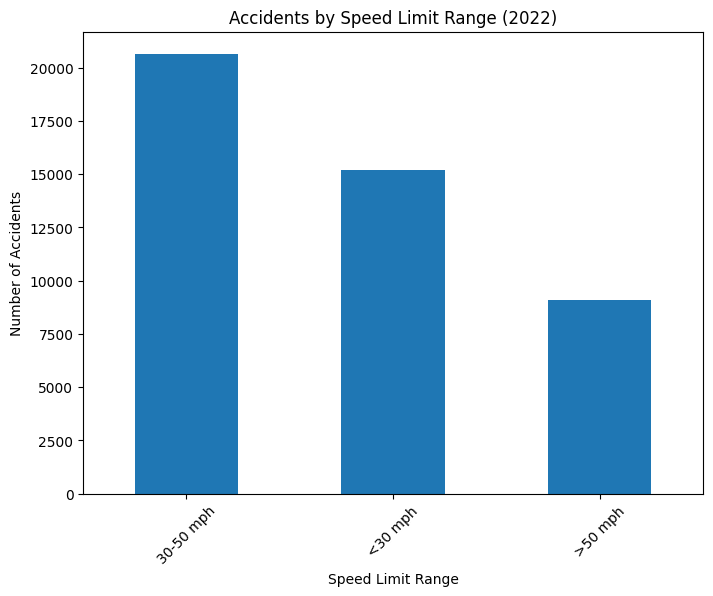

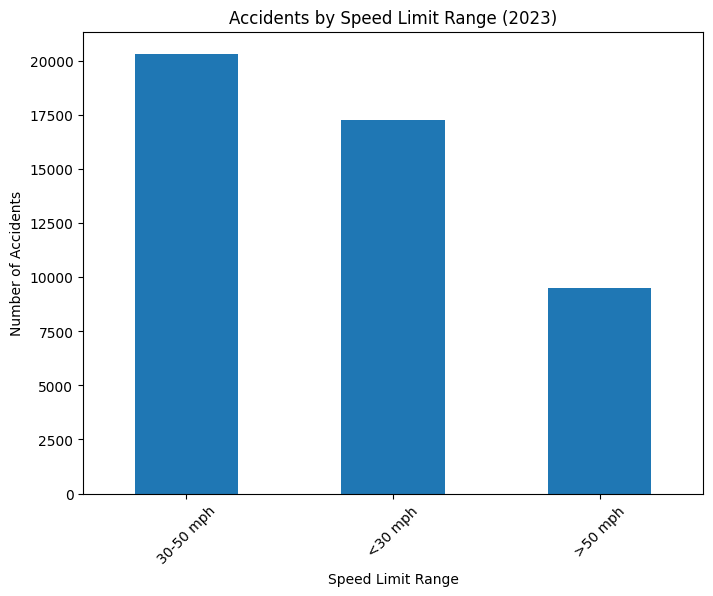

In [ ]:
# Plot accident frequencies for 2022
plt.figure(figsize=(8, 6))
accidents_by_speed_range_2022.plot(kind='bar')
plt.title('Accidents by Speed Limit Range (2022)')
plt.xlabel('Speed Limit Range')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Plot accident frequencies for 2023
plt.figure(figsize=(8, 6))
accidents_by_speed_range_2023.plot(kind='bar')
plt.title('Accidents by Speed Limit Range (2023)')
plt.xlabel('Speed Limit Range')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Create Interaction Terms for Speed Limit Ranges and Weather

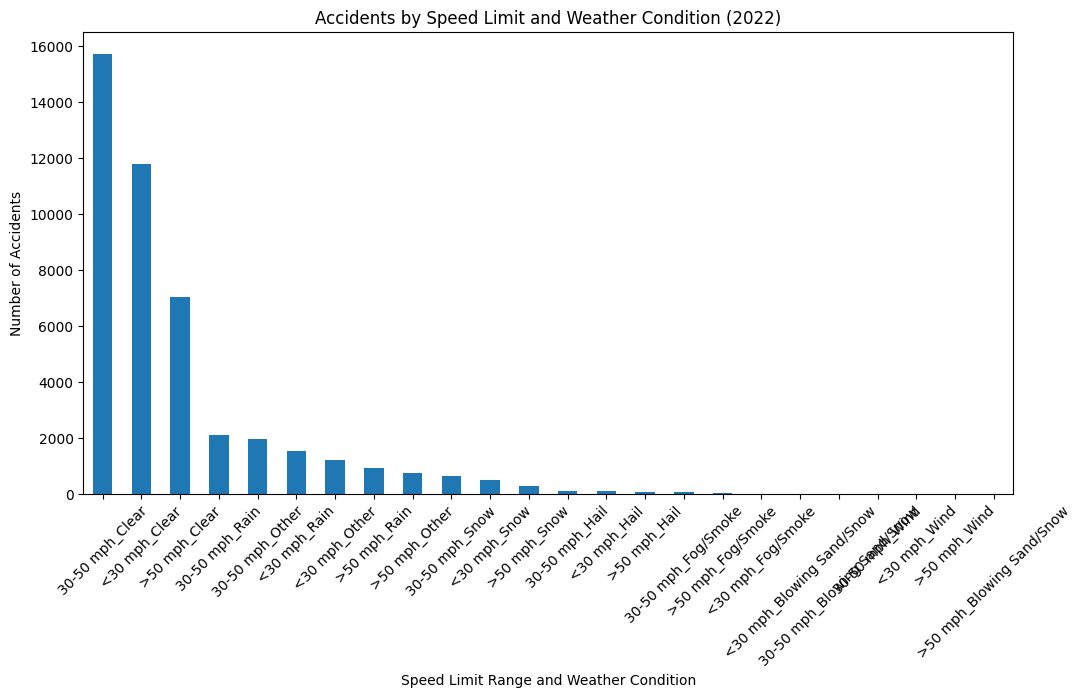

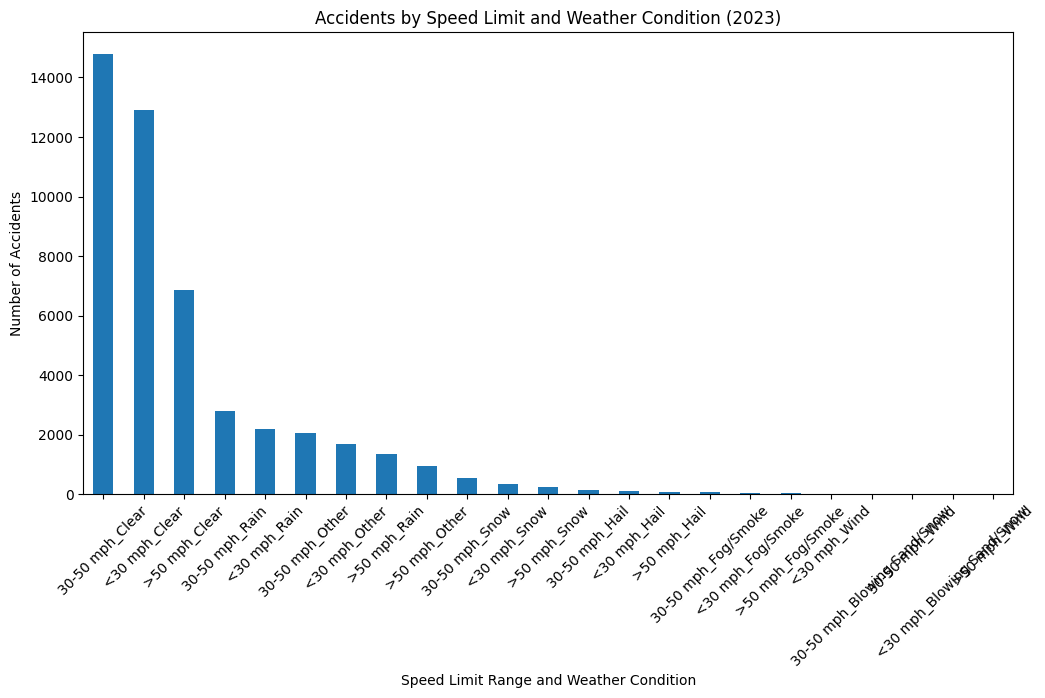

In [ ]:
df_2022['SPEED_WEATHER'] = df_2022['SPEED_LIMIT_RANGE'] + "_" + df_2022['WEATHER_SIMPLIFIED']
df_2023['SPEED_WEATHER'] = df_2023['SPEED_LIMIT_RANGE'] + "_" + df_2023['WEATHER_SIMPLIFIED']

# Visualize the interaction effect for 2022
plt.figure(figsize=(12, 6))
df_2022['SPEED_WEATHER'].value_counts().plot(kind='bar')
plt.title("Accidents by Speed Limit and Weather Condition (2022)")
plt.xlabel("Speed Limit Range and Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

# Visualize the interaction effect for 2023
plt.figure(figsize=(12, 6))
df_2023['SPEED_WEATHER'].value_counts().plot(kind='bar')
plt.title("Accidents by Speed Limit and Weather Condition (2023)")
plt.xlabel("Speed Limit Range and Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

## Modeling

### Train, Test and Model Selection

In [ ]:
# Ensure 'ACCIDENT_OCCURRENCE' is present in df_2023
if 'ACCIDENT_OCCURRENCE' not in df_2023.columns:
    df_2023['ACCIDENT_OCCURRENCE'] = 1  # Assuming all rows in df_2023 represent actual accidents

In [ ]:
df_2022['ACCIDENT_OCCURRENCE'] = 1
non_accidents_synthetic = generate_synthetic_data(df_2022.copy())
non_accidents_synthetic['ACCIDENT_OCCURRENCE'] = 0

# Combine accidents and non-accidents for a balanced dataset in df_combined
df_combined = pd.concat([df_2022, non_accidents_synthetic], ignore_index=True)
accidents = df_combined[df_combined['ACCIDENT_OCCURRENCE'] == 1]
non_accidents = df_combined[df_combined['ACCIDENT_OCCURRENCE'] == 0]

# Upsample non-accidents to match accidents, if necessary
if len(non_accidents) > 0:
    non_accidents_upsampled = resample(non_accidents, replace=True, n_samples=len(accidents), random_state=42)
    df_balanced = pd.concat([accidents, non_accidents_upsampled], ignore_index=True)
else:
    df_balanced = df_combined  # Use combined data if no upsampling needed

# Check balance
print("Training data balance:\n", df_balanced['ACCIDENT_OCCURRENCE'].value_counts())

# Step 2: Generate synthetic non-accidents for df_2023 to balance the test set
non_accidents_test = generate_synthetic_data(df_2023.copy())
non_accidents_test['ACCIDENT_OCCURRENCE'] = 0
df_test_balanced = pd.concat([df_2023, non_accidents_test], ignore_index=True)

# Step 3: Encode categorical variables consistently in both train and test sets
for df in [df_balanced, df_test_balanced]:
    df['SPEED_LIMIT_RANGE'] = df['SPEED_LIMIT_RANGE'].astype(str)
    df['WEATHER_SIMPLIFIED'] = df['WEATHER_SIMPLIFIED'].astype(str)
    df['SPEED_WEATHER'] = df['SPEED_WEATHER'].astype(str)

label_encoder = LabelEncoder()
# Encoding each categorical variable
for column in ['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER']:
    all_values = pd.concat([df_balanced[column], df_test_balanced[column]]).unique()
    label_encoder.fit(all_values)
    df_balanced[column] = label_encoder.transform(df_balanced[column])
    df_test_balanced[column] = label_encoder.transform(df_test_balanced[column])

# Step 4: Define features and target
X_train = df_balanced[['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER']]
y_train = df_balanced['ACCIDENT_OCCURRENCE']
X_test = df_test_balanced[['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER']]
y_test = df_test_balanced['ACCIDENT_OCCURRENCE']

# Step 5: Define hyperparameter tuning for individual models in the stacking ensemble
# Updated hyperparameter tuning to add diversity
rf_params = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting hyperparameter tuning (same as before, but you could add further diversity here if desired)
gb_params = {
    'gradient_boosting__n_estimators': [100, 200],
    'gradient_boosting__learning_rate': [0.05, 0.1],
    'gradient_boosting__max_depth': [3, 5]
}

# Define the pipelines again with updated parameter grids
rf_pipeline = Pipeline([('random_forest', RandomForestClassifier(random_state=42))])
gb_pipeline = Pipeline([('gradient_boosting', GradientBoostingClassifier(random_state=42))])

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_params, scoring='f1_weighted', cv=3)
gb_grid = GridSearchCV(gb_pipeline, param_grid=gb_params, scoring='f1_weighted', cv=3)

# Fit the models
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

# Step 6: Define and tune stacking model (same as before)
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', best_rf.named_steps['random_forest']),
        ('gradient_boosting', best_gb.named_steps['gradient_boosting'])
    ],
    final_estimator=LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
)

stacking_params = {'final_estimator__C': [0.1, 1, 10]}
stacking_grid = GridSearchCV(stacking_model, param_grid=stacking_params, scoring='f1_weighted', cv=3)
stacking_grid.fit(X_train, y_train)
best_stacking = stacking_grid.best_estimator_

# Step 7: Apply both isotonic and sigmoid calibration to the best individual models for better diversity in probabilities

# Calibrate Random Forest with isotonic calibration
calibrated_rf_isotonic = CalibratedClassifierCV(best_rf.named_steps['random_forest'], method='isotonic', cv=5)
calibrated_rf_isotonic.fit(X_train, y_train)
y_pred_proba_rf_isotonic = calibrated_rf_isotonic.predict_proba(X_test)[:, 1]

# Calibrate Gradient Boosting with sigmoid calibration
calibrated_gb_sigmoid = CalibratedClassifierCV(best_gb.named_steps['gradient_boosting'], method='sigmoid', cv=5)
calibrated_gb_sigmoid.fit(X_train, y_train)
y_pred_proba_gb_sigmoid = calibrated_gb_sigmoid.predict_proba(X_test)[:, 1]

# Evaluate calibrated models to see the range of predicted probabilities
print("Calibrated Random Forest probabilities (isotonic):", y_pred_proba_rf_isotonic[:10])
print("Calibrated Gradient Boosting probabilities (sigmoid):", y_pred_proba_gb_sigmoid[:10])

# Evaluate best models (including calibrated ones) and create submission file with the adjusted probabilities
for model_name, (model, y_pred_proba) in {
    "Calibrated RF (Isotonic)": (calibrated_rf_isotonic, y_pred_proba_rf_isotonic),
    "Calibrated GB (Sigmoid)": (calibrated_gb_sigmoid, y_pred_proba_gb_sigmoid),
    "Best Stacking Model": (best_stacking, best_stacking.predict_proba(X_test)[:, 1])
}.items():
    print(f"Evaluating {model_name}...")
    y_pred = (y_pred_proba >= 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{report}\n")

# Store calibrated probability predictions in df_test_balanced
df_test_balanced['PREDICTED_PROBABILITY_RF_ISOTONIC'] = y_pred_proba_rf_isotonic
df_test_balanced['PREDICTED_PROBABILITY_GB_SIGMOID'] = y_pred_proba_gb_sigmoid
df_test_balanced['PREDICTED_PROBABILITY_STACKING'] = best_stacking.predict_proba(X_test)[:, 1]

# Determine the final probability column to use in your submission (e.g., select based on best model performance)
df_test_balanced['FINAL_PREDICTED_PROBABILITY'] = df_test_balanced[['PREDICTED_PROBABILITY_RF_ISOTONIC',
                                                                    'PREDICTED_PROBABILITY_GB_SIGMOID',
                                                                    'PREDICTED_PROBABILITY_STACKING']].mean(axis=1)

# Apply a threshold and filter only records where predicted label is 1 for the submission
threshold = 0.5
df_test_balanced['PREDICTED_LABEL'] = (df_test_balanced['FINAL_PREDICTED_PROBABILITY'] >= threshold).astype(int)
filtered_df = df_test_balanced[df_test_balanced['PREDICTED_LABEL'] == 1]

# Save to submissions.csv
filtered_df[['PREDICTED_LABEL', 'FINAL_PREDICTED_PROBABILITY']].to_csv('submissions.csv', index=False)

Training data balance:
 ACCIDENT_OCCURRENCE
1    44954
0    44954
Name: count, dtype: int64
Calibrated Random Forest probabilities (isotonic): [1.         0.71418507 1.         0.71418507 0.71418507 0.75834263
 0.75834263 0.75834263 1.         1.        ]
Calibrated Gradient Boosting probabilities (sigmoid): [0.99986331 0.70938692 0.99974189 0.70938692 0.70938692 0.75892227
 0.75892227 0.75892227 0.99990446 0.99974189]
Evaluating Calibrated RF (Isotonic)...
Calibrated RF (Isotonic) - Accuracy: 0.8873, F1 Score: 0.8859
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     47119
           1       0.82      1.00      0.90     47119

    accuracy                           0.89     94238
   macro avg       0.91      0.89      0.89     94238
weighted avg       0.91      0.89      0.89     94238


Evaluating Calibrated GB (Sigmoid)...
Calibrated GB (Sigmoid) - Accuracy: 0.8873, F1 Score: 0.8859
Classification Report:
   

In [ ]:
df_2022['ACCIDENT_OCCURRENCE'] = 1
non_accidents_synthetic = generate_synthetic_data(df_2022.copy())
non_accidents_synthetic['ACCIDENT_OCCURRENCE'] = 0

# Combine accidents and non-accidents for a balanced dataset in df_combined
df_combined = pd.concat([df_2022, non_accidents_synthetic], ignore_index=True)
accidents = df_combined[df_combined['ACCIDENT_OCCURRENCE'] == 1]
non_accidents = df_combined[df_combined['ACCIDENT_OCCURRENCE'] == 0]

# Upsample non-accidents to match accidents, if necessary
if len(non_accidents) > 0:
    non_accidents_upsampled = resample(non_accidents, replace=True, n_samples=len(accidents), random_state=42)
    df_balanced = pd.concat([accidents, non_accidents_upsampled], ignore_index=True)
else:
    df_balanced = df_combined  # Use combined data if no upsampling needed

# Check balance
print("Training data balance:\n", df_balanced['ACCIDENT_OCCURRENCE'].value_counts())

# Step 2: Generate synthetic non-accidents for df_2023 to balance the test set
non_accidents_test = generate_synthetic_data(df_2023.copy())
non_accidents_test['ACCIDENT_OCCURRENCE'] = 0
df_test_balanced = pd.concat([df_2023, non_accidents_test], ignore_index=True)

# Step 3: Encode categorical variables consistently in both train and test sets
for df in [df_balanced, df_test_balanced]:
    df['SPEED_LIMIT_RANGE'] = df['SPEED_LIMIT_RANGE'].astype(str)
    df['WEATHER_SIMPLIFIED'] = df['WEATHER_SIMPLIFIED'].astype(str)
    df['SPEED_WEATHER'] = df['SPEED_WEATHER'].astype(str)

label_encoder = LabelEncoder()
# Encoding each categorical variable
for column in ['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER']:
    all_values = pd.concat([df_balanced[column], df_test_balanced[column]]).unique()
    label_encoder.fit(all_values)
    df_balanced[column] = label_encoder.transform(df_balanced[column])
    df_test_balanced[column] = label_encoder.transform(df_test_balanced[column])

# Step 4: Define features and target
X_train = df_balanced[['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER']]
y_train = df_balanced['ACCIDENT_OCCURRENCE']
X_test = df_test_balanced[['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER']]
y_test = df_test_balanced['ACCIDENT_OCCURRENCE']

# Step 5: Define hyperparameter tuning for individual models in the stacking ensemble
# Updated hyperparameter tuning to add diversity
rf_params = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting hyperparameter tuning (same as before, but you could add further diversity here if desired)
gb_params = {
    'gradient_boosting__n_estimators': [100, 200],
    'gradient_boosting__learning_rate': [0.05, 0.1],
    'gradient_boosting__max_depth': [3, 5]
}

# Define the pipelines again with updated parameter grids
rf_pipeline = Pipeline([('random_forest', RandomForestClassifier(random_state=42))])
gb_pipeline = Pipeline([('gradient_boosting', GradientBoostingClassifier(random_state=42))])

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_params, scoring='f1_weighted', cv=3)
gb_grid = GridSearchCV(gb_pipeline, param_grid=gb_params, scoring='f1_weighted', cv=3)

# Fit the models
rf_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

# Step 6: Define and tune stacking model (same as before)
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', best_rf.named_steps['random_forest']),
        ('gradient_boosting', best_gb.named_steps['gradient_boosting'])
    ],
    final_estimator=LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
)

stacking_params = {'final_estimator__C': [0.1, 1, 10]}
stacking_grid = GridSearchCV(stacking_model, param_grid=stacking_params, scoring='f1_weighted', cv=3)
stacking_grid.fit(X_train, y_train)
best_stacking = stacking_grid.best_estimator_

# Step 7: Apply calibration to the best individual models for more diverse probabilities
# Calibrate Random Forest
calibrated_rf = CalibratedClassifierCV(best_rf.named_steps['random_forest'], method='isotonic', cv=3)
calibrated_rf.fit(X_train, y_train)
y_pred_proba_rf = calibrated_rf.predict_proba(X_test)[:, 1]

# Calibrate Gradient Boosting
calibrated_gb = CalibratedClassifierCV(best_gb.named_steps['gradient_boosting'], method='sigmoid', cv=3)
calibrated_gb.fit(X_train, y_train)
y_pred_proba_gb = calibrated_gb.predict_proba(X_test)[:, 1]

# Evaluate calibrated models to see the range of predicted probabilities
print("Calibrated Random Forest probabilities:", y_pred_proba_rf[:10])
print("Calibrated Gradient Boosting probabilities:", y_pred_proba_gb[:10])

# Evaluate best models (including calibrated ones)
for model_name, (model, y_pred_proba) in {
    "Calibrated Random Forest": (calibrated_rf, y_pred_proba_rf),
    "Calibrated Gradient Boosting": (calibrated_gb, y_pred_proba_gb),
    "Best Stacking Model": (best_stacking, best_stacking.predict_proba(X_test)[:, 1])
}.items():
    print(f"Evaluating {model_name}...")
    y_pred = (y_pred_proba >= 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{report}\n")


# Cross-validate best stacking model
cv_scores = cross_val_score(best_stacking, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"Best Stacking Model - Cross-Validation F1 Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Store probability predictions in df_test_balanced
df_test_balanced['PREDICTED_PROBABILITY'] = best_stacking.predict_proba(X_test)[:, 1]

Training data balance:
 ACCIDENT_OCCURRENCE
1    44954
0    44954
Name: count, dtype: int64
Calibrated Random Forest probabilities: [1.         0.70956777 1.         0.70956777 0.70956777 0.75480768
 0.75480768 0.75480768 1.         1.        ]
Calibrated Gradient Boosting probabilities: [0.99974768 0.70428021 0.99989313 0.70428021 0.70428021 0.75580301
 0.75580301 0.75580301 0.99993605 0.99989313]
Evaluating Calibrated Random Forest...
Calibrated Random Forest - Accuracy: 0.8891, F1 Score: 0.8878
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     47119
           1       0.82      1.00      0.90     47119

    accuracy                           0.89     94238
   macro avg       0.91      0.89      0.89     94238
weighted avg       0.91      0.89      0.89     94238


Evaluating Calibrated Gradient Boosting...
Calibrated Gradient Boosting - Accuracy: 0.8891, F1 Score: 0.8878
Classification Report:
              

In [ ]:
# Generate predicted labels based on the threshold of 0.5
df_test_balanced['PREDICTED_LABEL'] = (df_test_balanced['PREDICTED_PROBABILITY'] >= 0.5).astype(int)

# Now, filter to include only predictions with label 1
filtered_df = df_test_balanced[df_test_balanced['PREDICTED_LABEL'] == 1]

# Save to submissions.csv
filtered_df[['PREDICTED_LABEL', 'PREDICTED_PROBABILITY']].to_csv('submissions.csv', index=False)

## Visualization of Results and Insights

### Feature Importance for Random Forest (To Understand Key Predictors)

In [ ]:
print(df_test_balanced.head())

  CITY_TOWN_NAME       AMBNT_LIGHT_DESCR WEATH_COND_DESCR  \
0         DEDHAM  Dark - lighted roadway      Rain/Cloudy   
1        READING  Dark - lighted roadway      Clear/Clear   
2      WAKEFIELD  Dark - lighted roadway      Cloudy/Rain   
3      WELLESLEY                Daylight            Clear   
4      WELLESLEY                Daylight            Clear   

  ROAD_SURF_COND_DESCR RDWY_JNCT_TYPE_DESCR TRAF_CNTRL_DEVC_TYPE_DESCR  \
0                  Wet      Not at junction                No controls   
1                  Dry      Not at junction     Traffic control signal   
2                  Wet      Not at junction                No controls   
3                  Dry      Not at junction                No controls   
4                  Dry       T-intersection     Traffic control signal   

  AGE_DRVR_YNGST AGE_DRVR_OLDEST  CNTY_NAME  SPEED_LIMIT  ...  \
0          25-34           35-44    NORFOLK         35.0  ...   
1          16-17           45-54  MIDDLESEX         35.0  

Visualizing results for the Best Model...


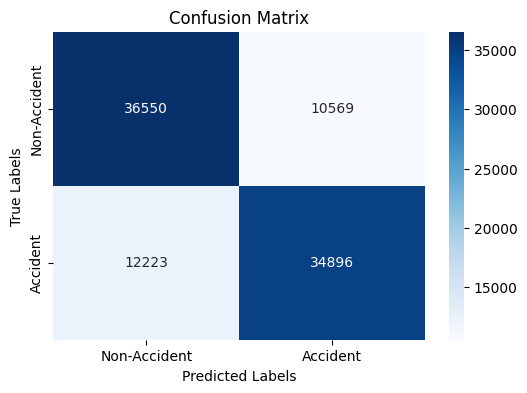

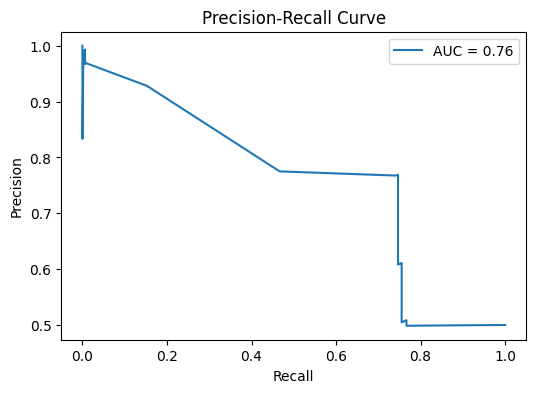

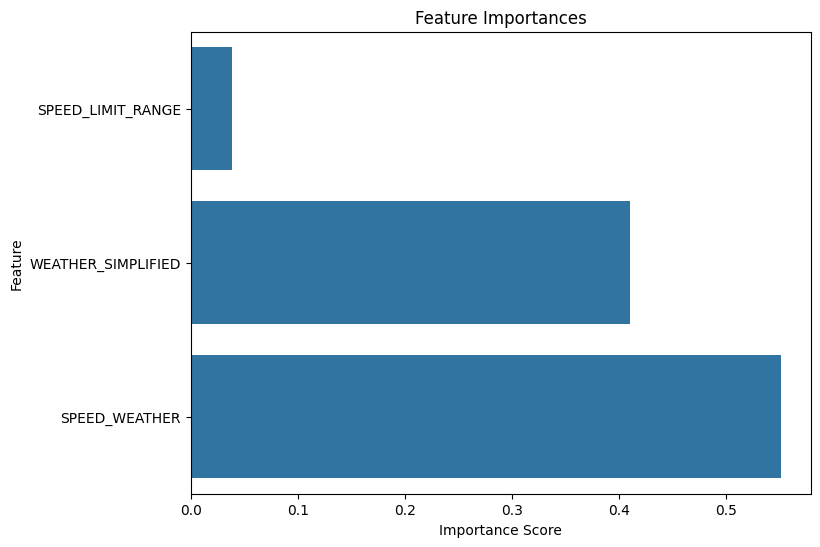

In [ ]:
# Step 1: Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Accident', 'Accident'], yticklabels=['Non-Accident', 'Accident'])
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Step 2: Plot Precision-Recall Curve
def plot_precision_recall_curve(y_test, y_pred_proba, title="Precision-Recall Curve"):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auc_score = auc(recall, precision)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label=f"AUC = {auc_score:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.show()

# Step 3: Plot Feature Importances (only for models with feature_importances_)
def plot_feature_importances(model, feature_names, title="Feature Importances"):
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 6))
        sns.barplot(x=feature_importances, y=feature_names)
        plt.title(title)
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.show()

# Assuming `best_model` is your chosen model
print("Visualizing results for the Best Model...")

# Predict on the test set
y_pred = (best_model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

# Plot Precision-Recall Curve
plot_precision_recall_curve(y_test, y_pred_proba)

# Plot Feature Importances
plot_feature_importances(best_model, ['SPEED_LIMIT_RANGE', 'WEATHER_SIMPLIFIED', 'SPEED_WEATHER'])

# Step 4: Save predictions to "submissions.csv"
df_test_balanced['PREDICTED_PROBABILITY'] = y_pred_proba
df_test_balanced['PREDICTED_LABEL'] = y_pred
df_test_balanced[['PREDICTED_LABEL', 'PREDICTED_PROBABILITY']].to_csv("submissions.csv", index=False)

## Save the Processed Data (Final)

In [ ]:
# Save processed DataFrame for future use
output_path = '/content/drive/MyDrive/BU/Fall 2024/CS506/CS506_Final_Project/Dataset/processed_data.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

In [ ]:
# Specify the path and filename to save the modified data
# output_path = '/content/drive/MyDrive/BU/Fall 2024/CS506/CS506_Final_Project/Dataset/2022/2022_Crashes_Modified.csv'

# Save the modified DataFrame to a CSV file
# filtered_df.to_csv(output_path, index=False)

# print(f"Modified data has been saved to {output_path}")
